<a href="https://colab.research.google.com/github/Victor-F-Teodoro/signal-treatment/blob/main/trait_don_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing the packages we'll need

!pip install spectrum
import math
from pylab import plot, log10, linspace, axis
from spectrum import *
from scipy.io import wavfile
from scipy import signal
from google.colab import files
import io 
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import pandas as pd
import ipywidgets as wg


In [ ]:
# choosing the file we will analyse. The one from the results bellow is "croisement4.wav"

croisement = files.upload()


Saving croisement4.wav to croisement4.wav


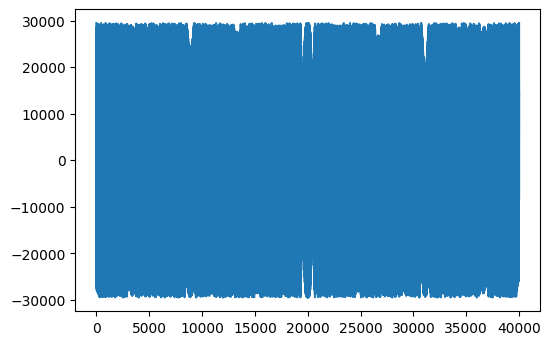

In [ ]:
# Data extraction from provided file and visualization

samplerate, data  = wavfile.read(io.BytesIO(list(croisement.values())[0]))
fig = plt.figure(dpi=100, figsize=(6,4))
plt.plot(np.arange(len(data)), data)
plt.show()

In [ ]:
# Ideal window size (samplerate * 40ms)
N = int(samplerate * 0.04)

# build all windows
windows = np.array([np.copy(data[i*N:i*N+N]) for i in range(len(data)//N)])


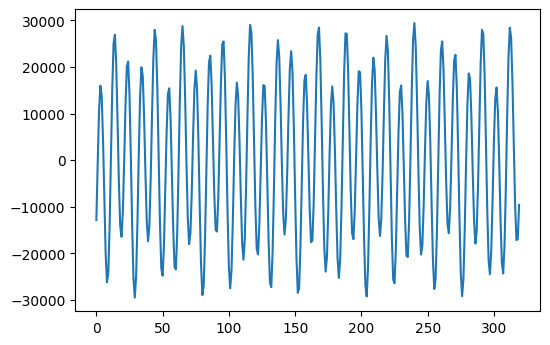

In [ ]:
# Closer look of the signal
i = 19
fig = plt.figure(dpi=100, figsize=(6,4))
plt.plot(np.arange(len(windows[i])), windows[i])
plt.show()

1


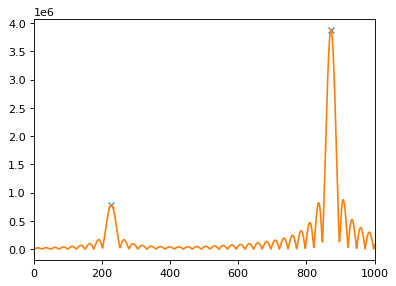

2


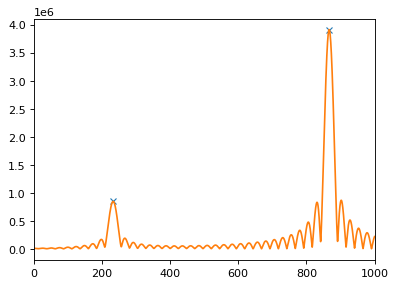

3


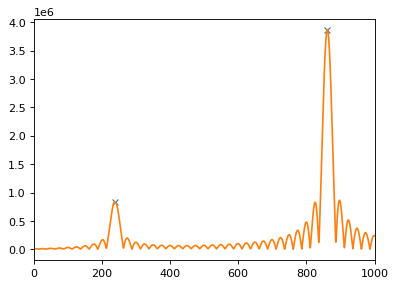

4


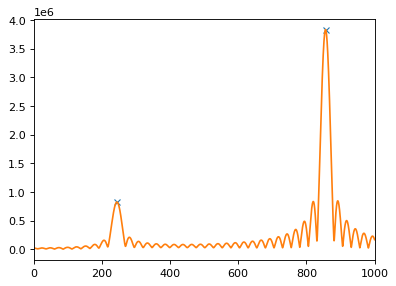

5


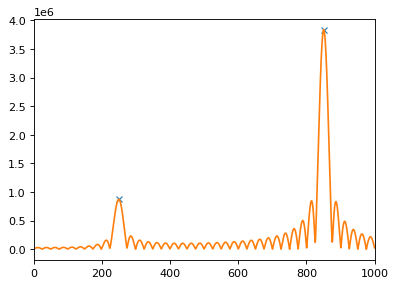

6


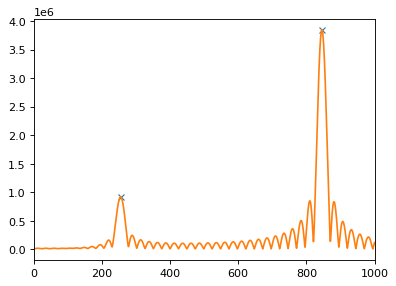

7


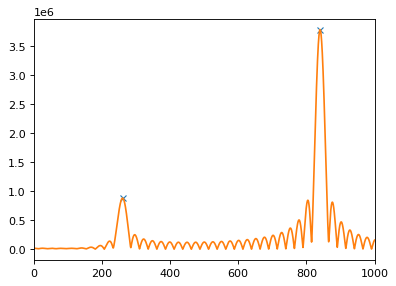

8


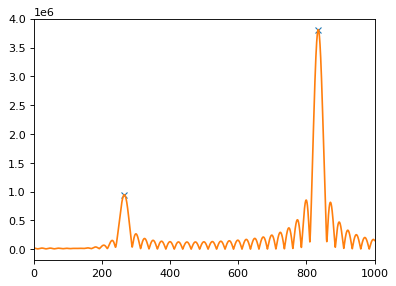

9


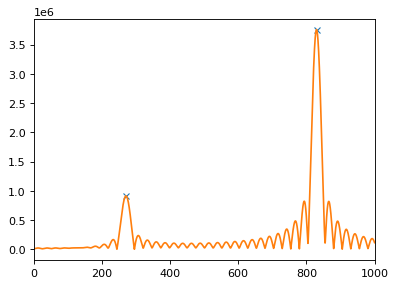

10


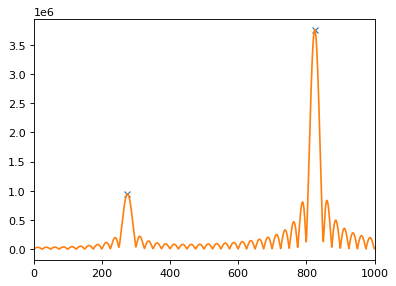

11


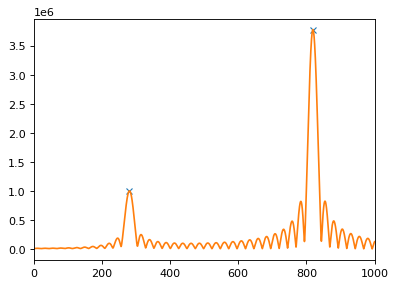

12


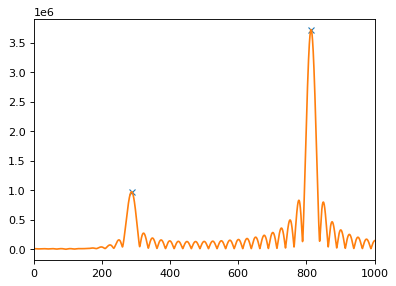

13


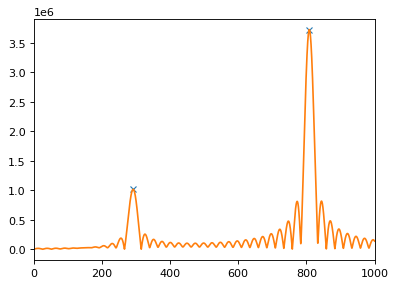

14


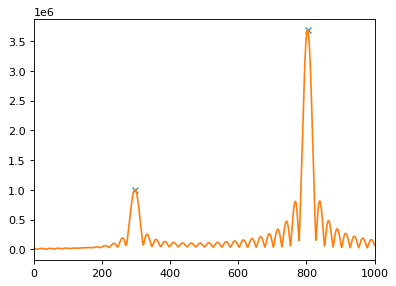

15


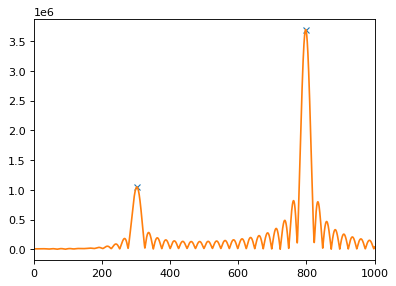

16


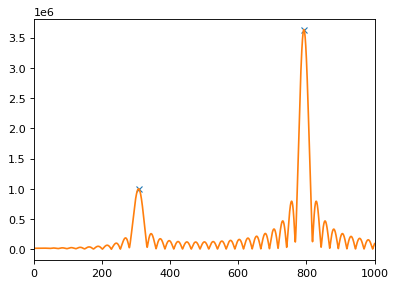

17


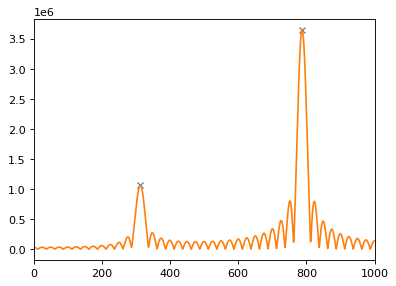

18


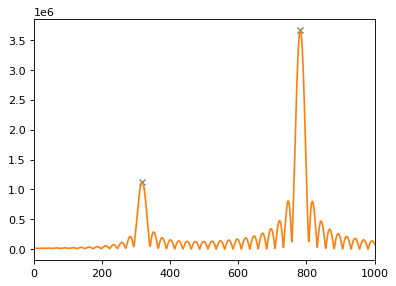

19


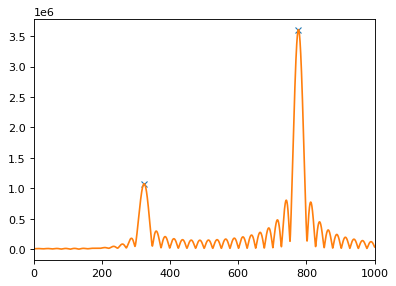

20


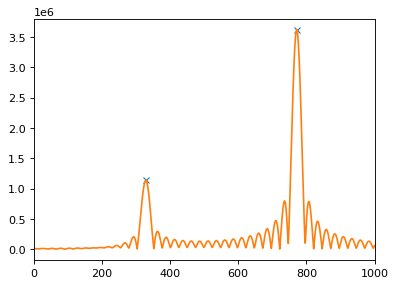

21


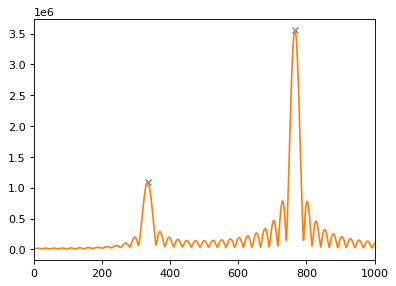

22


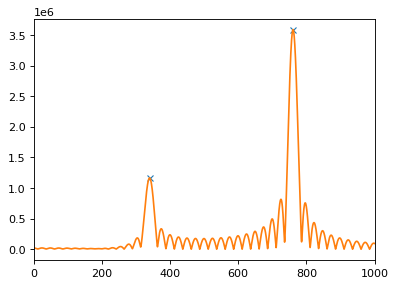

23


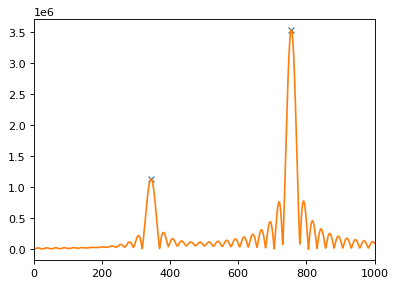

24


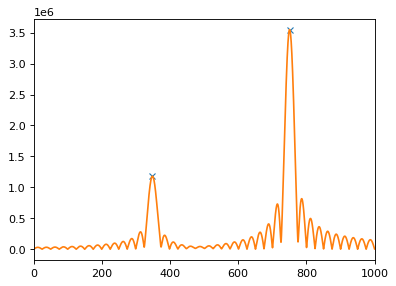

25


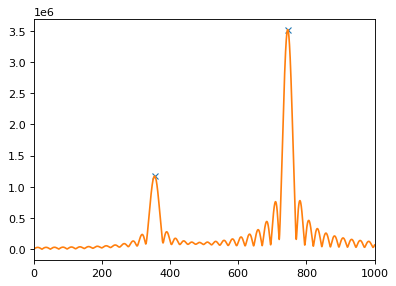

26


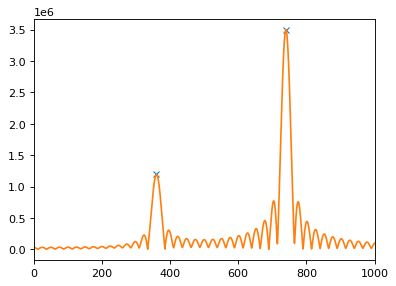

27


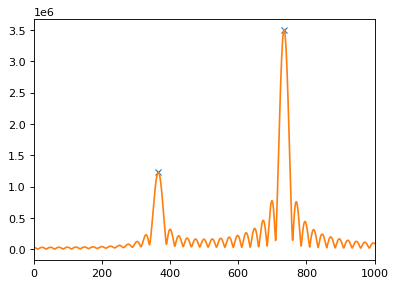

28


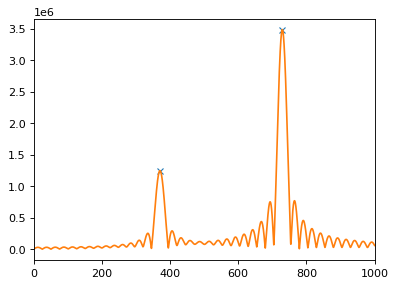

29


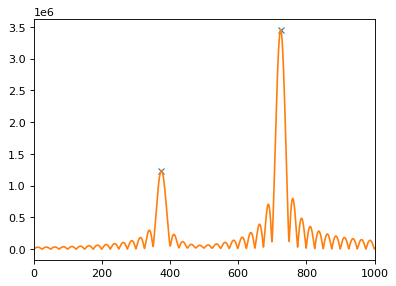

30


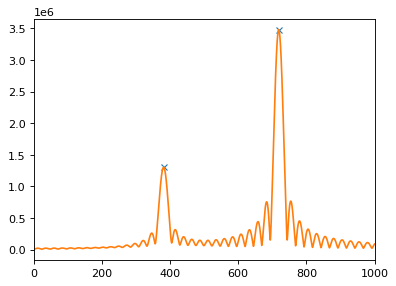

31


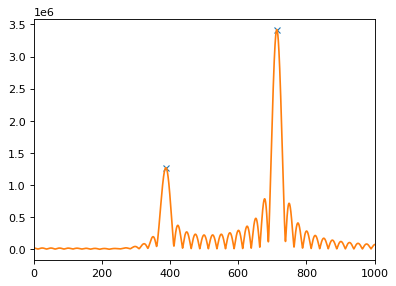

32


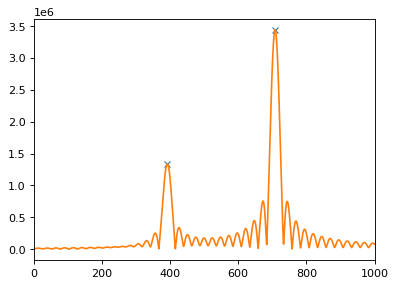

33


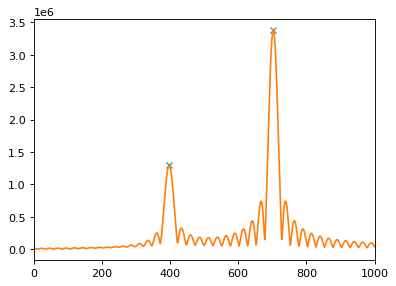

34


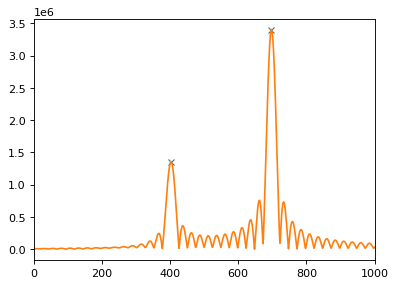

35


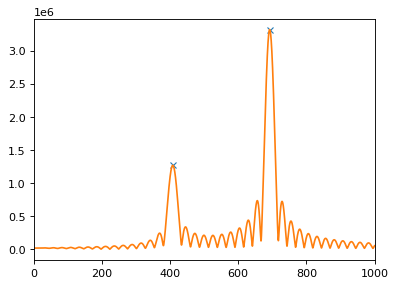

36


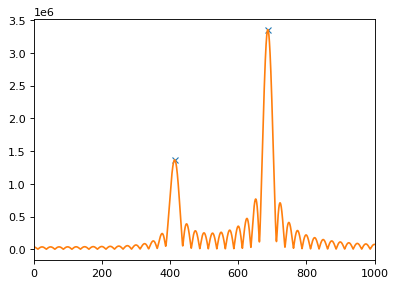

37


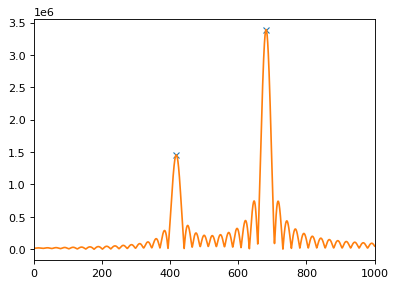

38


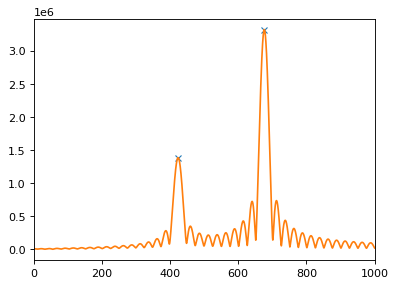

39


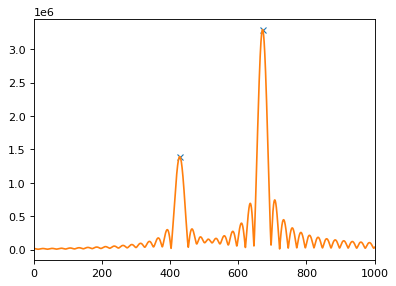

40


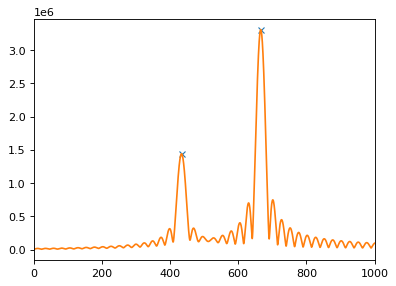

41


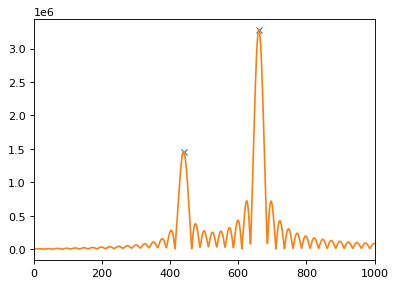

42


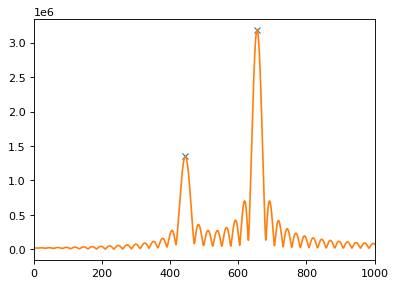

43


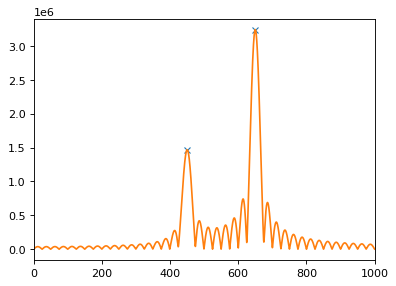

44


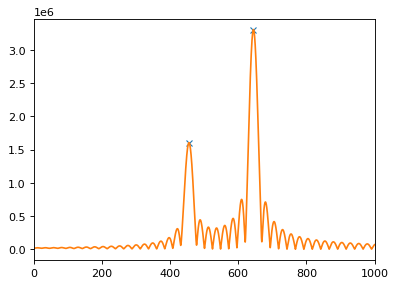

45


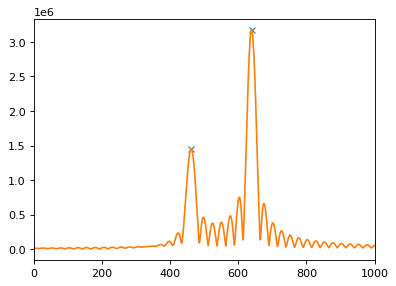

46


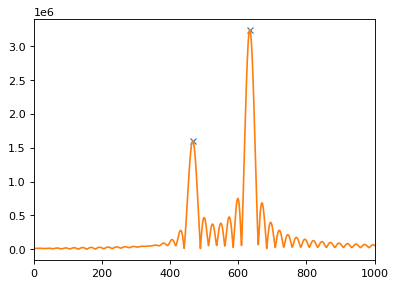

47


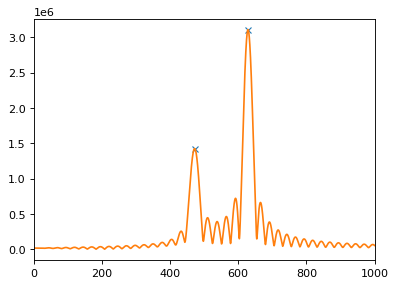

48


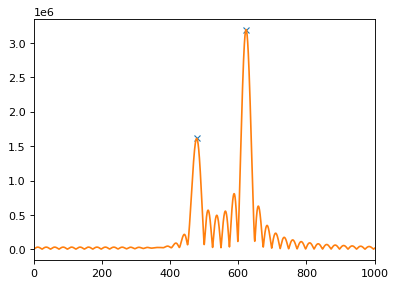

49


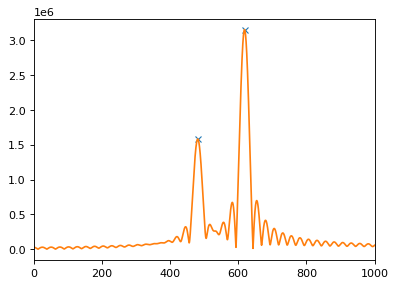

50


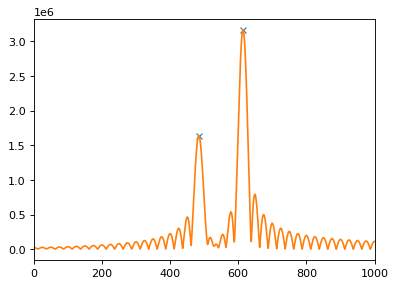

51


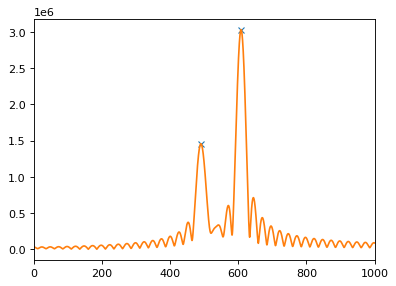

52


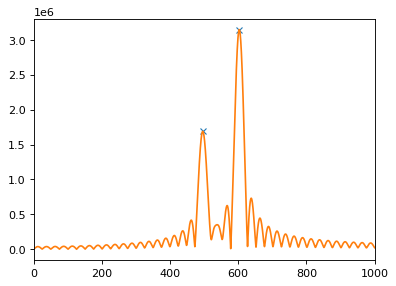

53


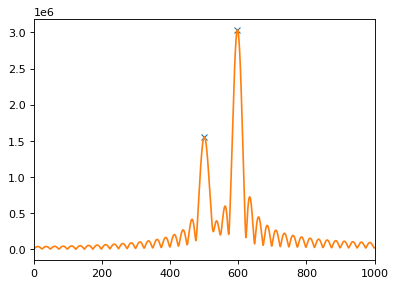

54


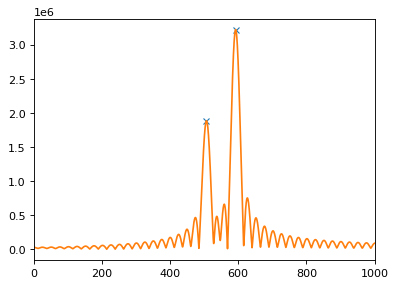

55


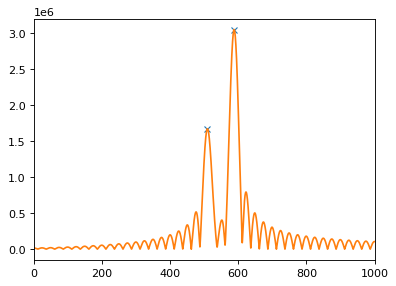

56


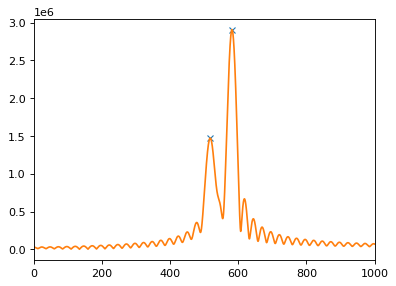

57


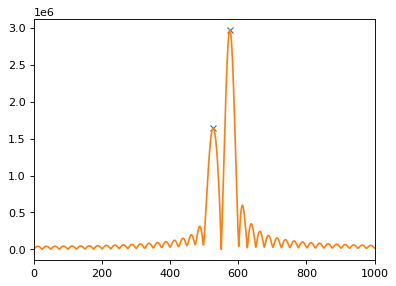

58


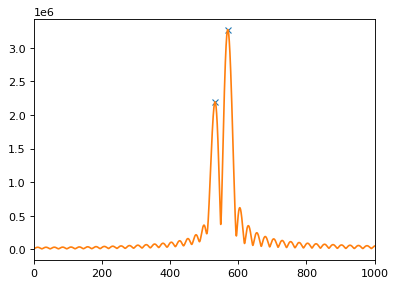

59
signals are crossing
f_a True


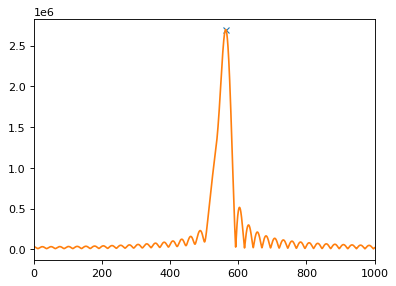

60
signals are crossing
f_a True


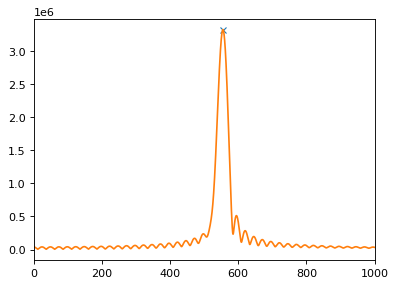

61
signals are crossing
f_a True


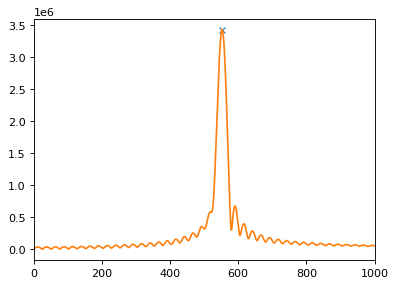

62
signals are crossing
f_a True


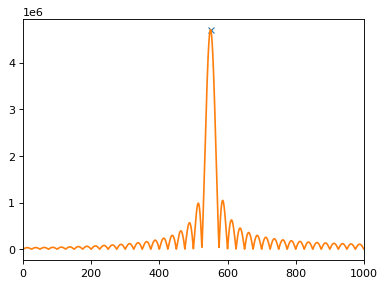

63
signals are crossing
f_a True


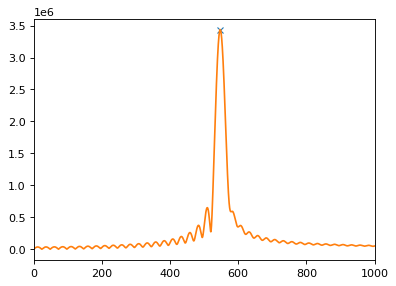

64
signals are crossing
f_a True


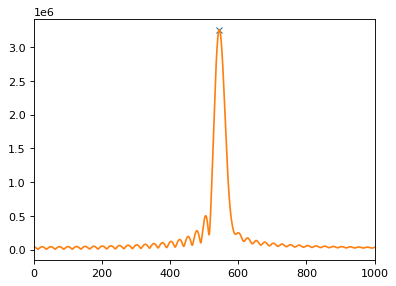

65
signals are crossing
f_a True


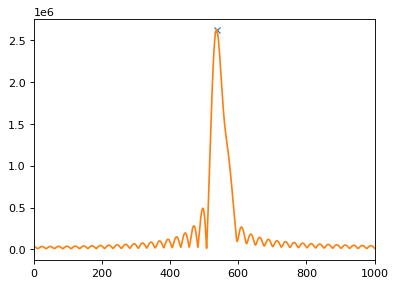

66
A crossing has hapenned


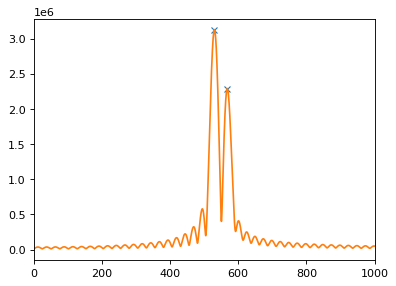

67


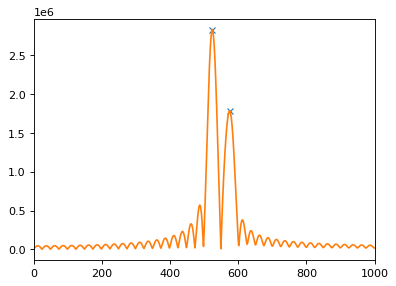

68


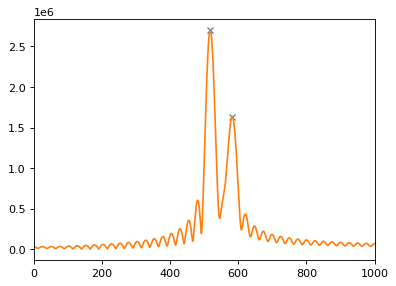

69


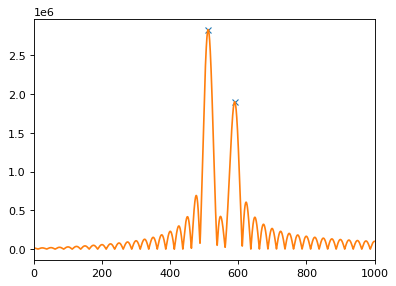

70


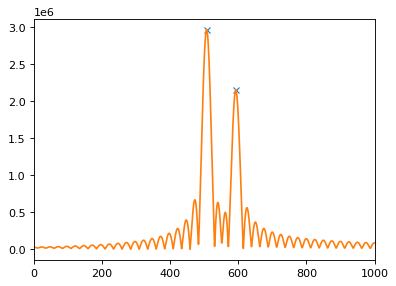

71


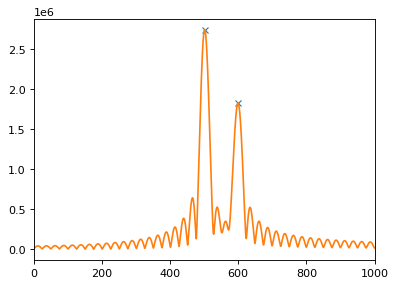

72


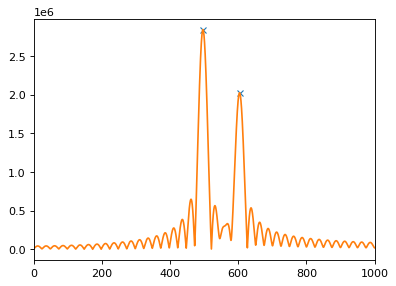

73


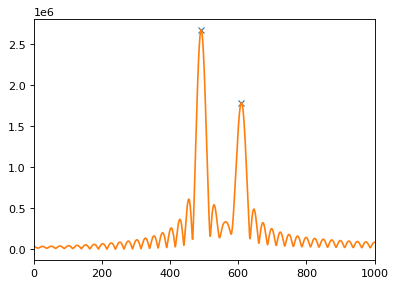

74


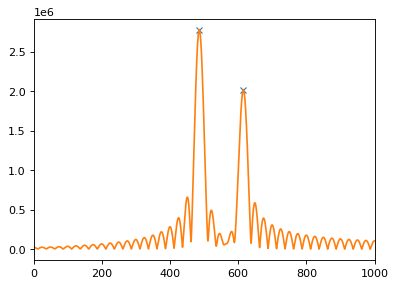

75


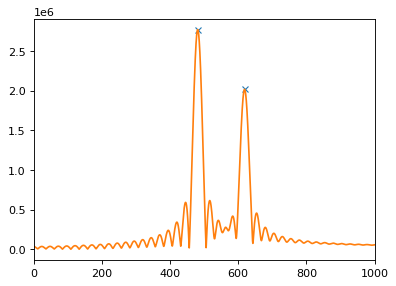

76


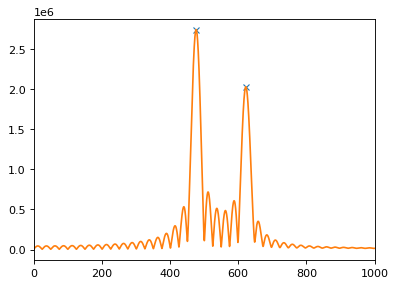

77


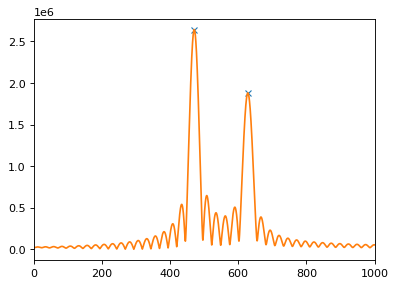

78


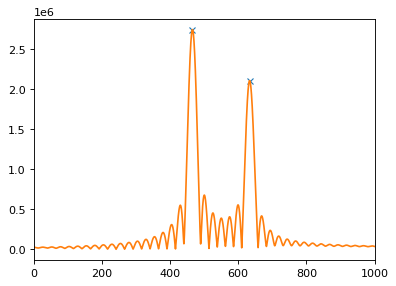

79


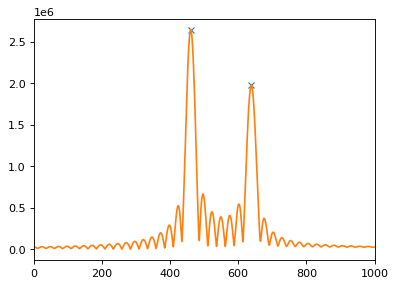

80


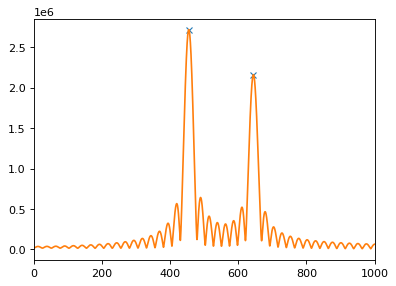

81


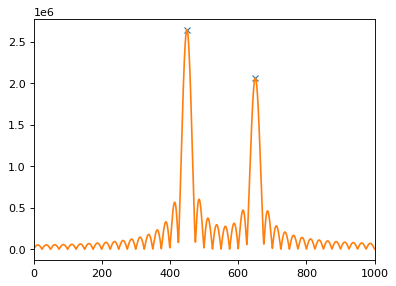

82


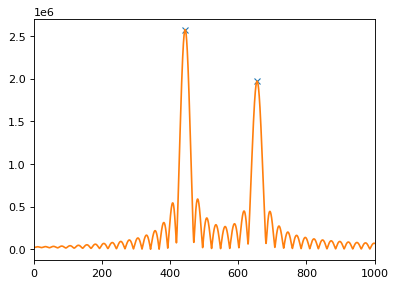

83


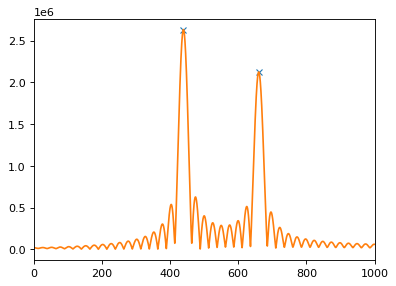

84


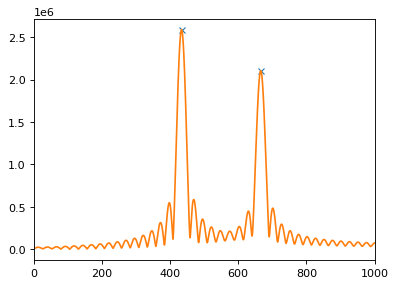

85


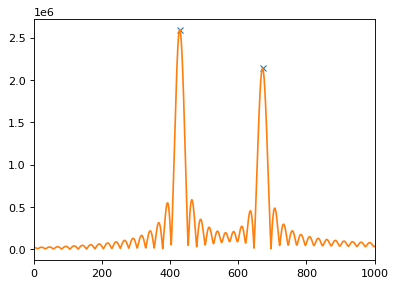

86


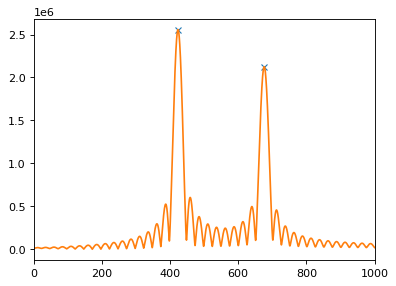

87


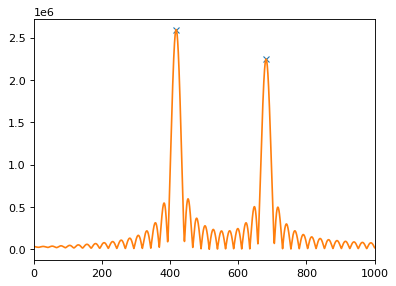

88


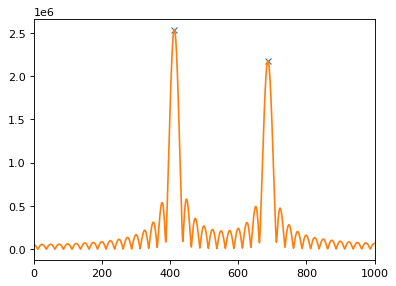

89


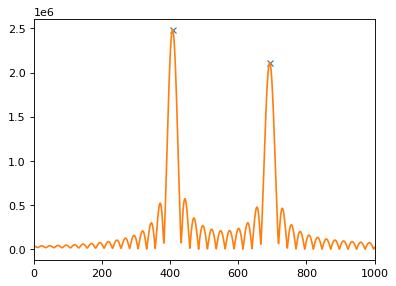

90


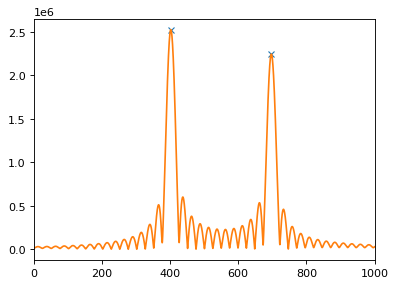

91


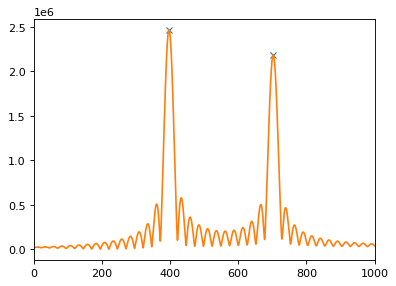

92


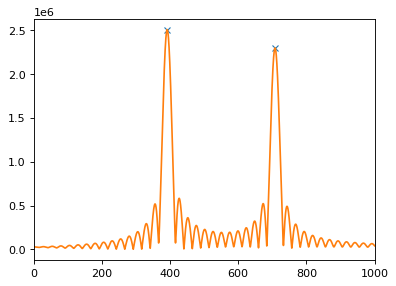

93


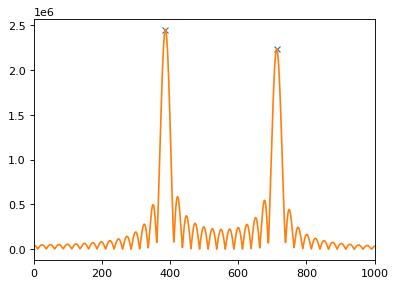

94


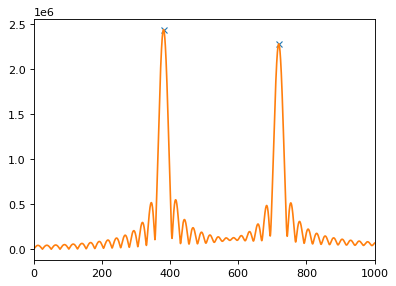

95


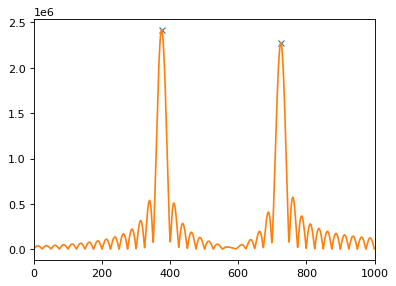

96


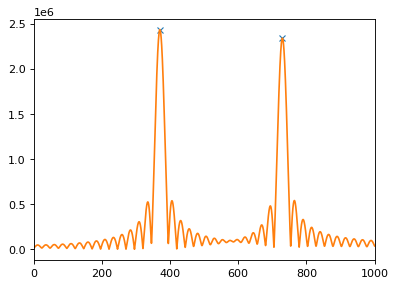

97


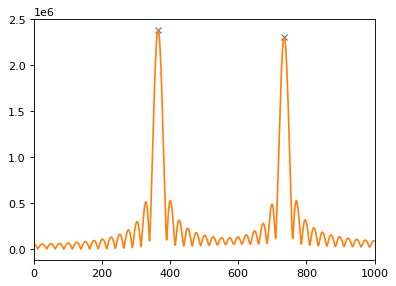

98


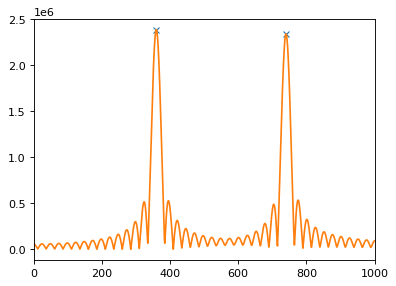

99


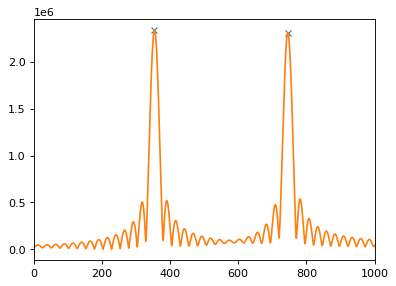

100


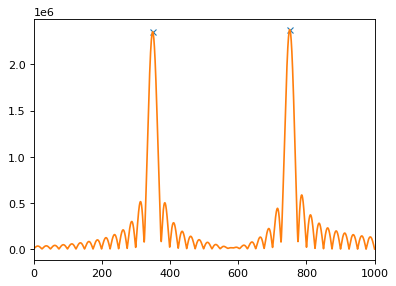

101


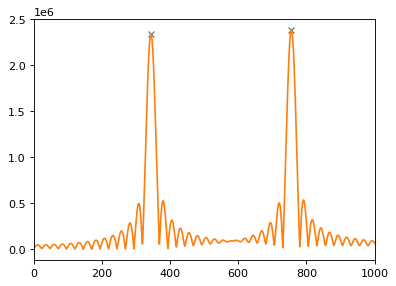

102


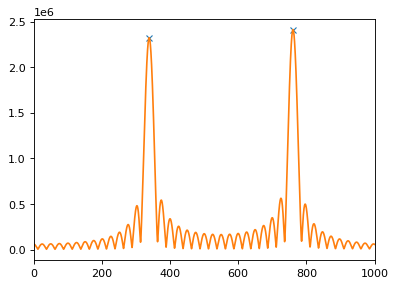

103


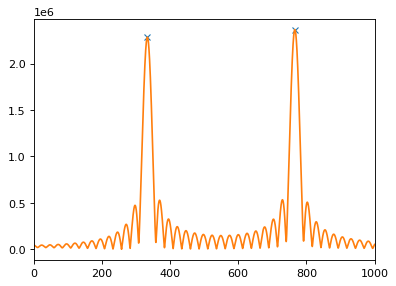

104


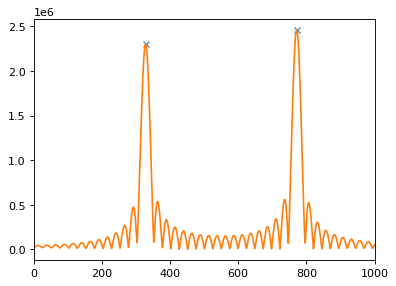

105


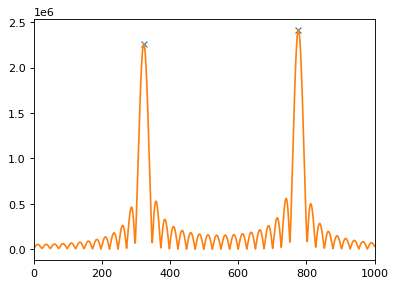

106


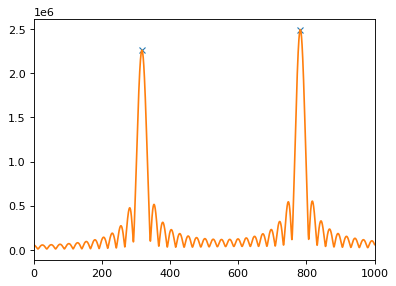

107


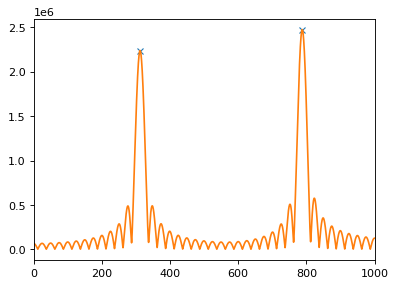

108


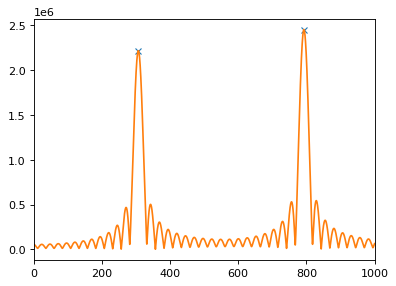

109


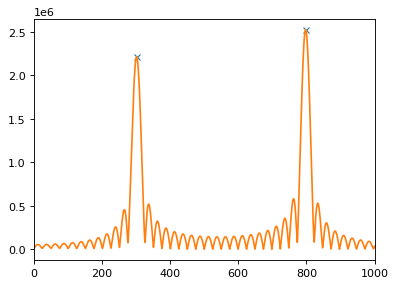

110


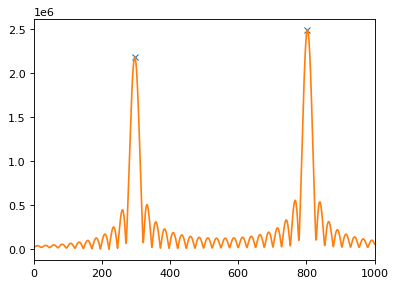

111


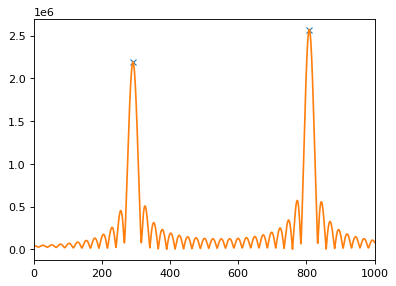

112


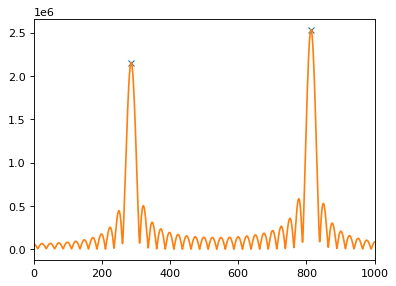

113


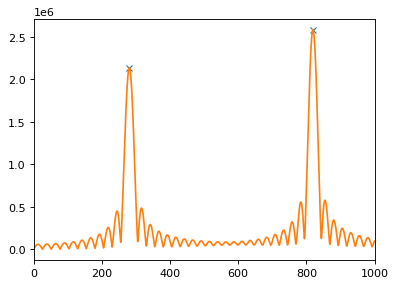

114


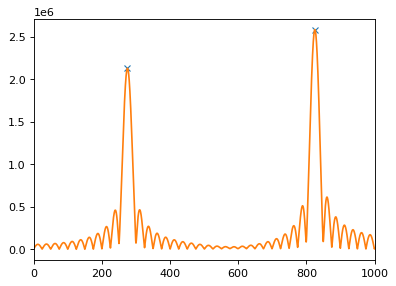

115


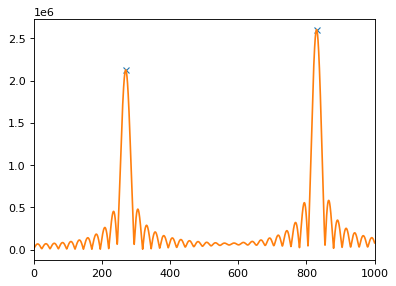

116


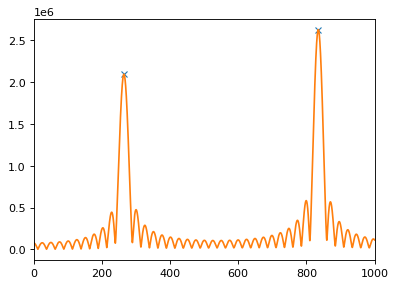

117


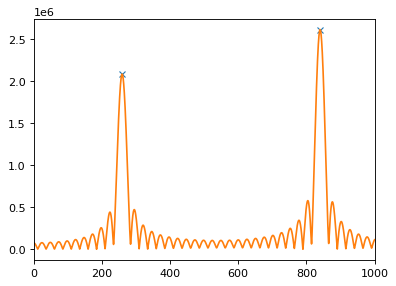

118


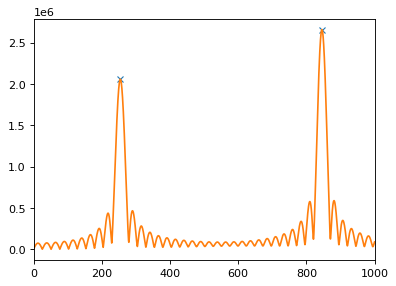

119


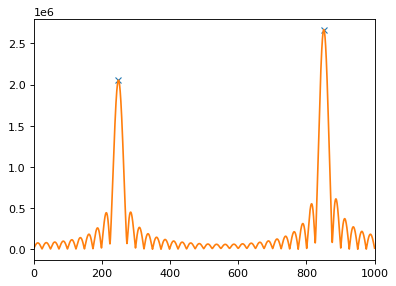

120


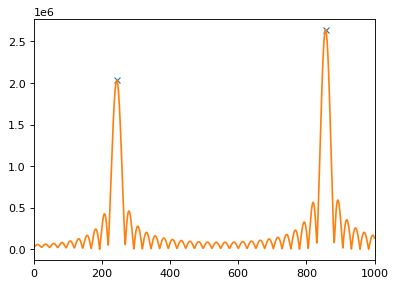

121


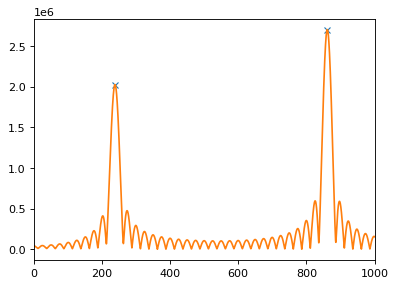

122


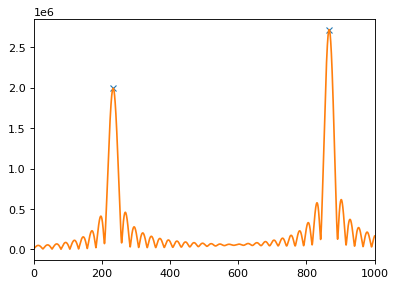

123


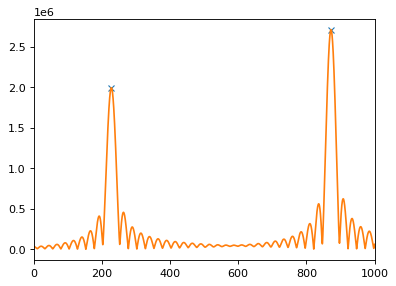

124


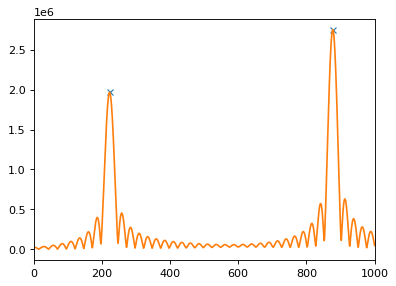

Frequencies Found


0           1
1  227.783203  872.314453
2  233.520508  866.943359
3  239.013672  861.572266
4  244.506836  856.323242
5  249.877930  850.952148



A total of 7  tranches could not be analysed, corresponding to  5.65  % of the total


In [ ]:
# Finding the frequencies with the FFT


def get_fft(window):
    len_window = len(window)
    channel_1 = np.zeros(2**16)
    channel_1[0:len_window] = window
    fourier = np.fft.fft(channel_1)
    freq_bins = np.fft.fftfreq(len(fourier), d=1/samplerate)
    return np.abs(fourier[0:len(fourier)//2]), freq_bins[:len(fourier)//2]

dic_peaks_fft = {}
dic_left_peaks_fft = {}
dic_right_peaks_fft = {}
jump = 0
flag_analysis = False

# Aplying FFT on the tranches
for i in range(1, len(windows)):
  print(i)
  fourier, bins = get_fft(windows[i])
  
  # Finding the peaks of the tranch
  max_list, _ = signal.find_peaks(fourier, height=750000, prominence=1, width=150)
  peaks = []
  for j in max_list:
    peaks.append(bins[j])
  dic_peaks_fft[i] = peaks

  # Detecting the crossings
  left_peak_bin = bins[np.min(max_list)]
  left_peak_int = fourier[np.min(max_list)]
  right_peak_bin = bins[np.max(max_list)]
  right_peak_int = fourier[np.max(max_list)]
  # If we have two peaks, a crossing is not happening
  if len(peaks) == 2:
    jump = 0
    dic_left_peaks_fft[i] = (left_peak_bin, left_peak_int)
    dic_right_peaks_fft[i] = (right_peak_bin, right_peak_int)
  # If we don't, we print the message bellow, and start to increase the variable
  # jump, which will tell for how many trames the crossing passed
  else:
      print('signals are crossing')
      jump += 1
      dic_left_peaks_fft[i] = dic_left_peaks_fft[i-jump]
      dic_right_peaks_fft[i] = dic_right_peaks_fft[i-jump]
      flag_analysis = True
      print('f_a', flag_analysis)
  # When we have two peaks again, we compare the trame before the crossing
  # and the one right after. If they diverge more than 20%, a semi crossing
  # has happened (the signal crossed and then came back). If it is within
  # the 20% range, a normal crossing has taken place
  if flag_analysis == True and len(peaks) == 2:
    if (dic_left_peaks_fft[i-1-jump][0]*0.80 <= dic_left_peaks_fft[i][1]) and (dic_left_peaks_fft[i][1] <= dic_left_peaks_fft[i-1-jump][1]*1.2):    
      print('A semi crossing hapenned')
    else:
      print('A crossing has hapenned')
    flag_analysis = False
  
  # Plotting
  fig = plt.figure(dpi=80, figsize=(5.5, 4))
  plt.plot(bins[max_list], fourier[max_list], "x")
  plt.plot(bins, fourier)
  plt.xlim(0,1000)
  plt.show()

# Creating a DataFrame of the identified frequencies
df = pd.DataFrame(dic_peaks_fft.values(), dic_peaks_fft.keys())
print("Frequencies Found")
display(df.head())

# Displaying the number of tranches where we couldn't identify the two frequencies
num_lost = [i for i in dic_peaks_fft.values() if len(i) < 2]
print("\n\nA total of", len(num_lost), " tranches could not be analysed, corresponding to ", 
      round(len(num_lost)/len(dic_peaks_fft)*100, 2), " % of the total")



In [ ]:
## This part is only made to make visualization easier, the algo is still the same

def get_fft(window):
    len_window = len(window)
    channel_1 = np.zeros(2**16)
    channel_1[0:len_window] = window
    fourier = np.fft.fft(channel_1)
    freq_bins = np.fft.fftfreq(len(fourier), d=1/samplerate)
    return np.abs(fourier[0:len(fourier)//2]), freq_bins[:len(fourier)//2]


dic_left_peaks_fft = {}
dic_right_peaks_fft = {}

global flag_analysis_2
flag_analysis_2 = False

global jumpp 
jumpp = 0

#@title Window slicing
def window_vis(i=1):
    global jumpp
    global flag_analysis_2
    """
    function for displaying windows
    """ 
    print(i)
    fourier, bins = get_fft(windows[i])
    
    # Finding the peaks of the tranch
    max_list, _ = signal.find_peaks(fourier, height=750000, prominence=1, width=150)
    peaks = []
    for j in max_list:
      peaks.append(bins[j])
    

    # Detecting the crossings
    left_peak_bin = bins[np.min(max_list)]
    left_peak_int = fourier[np.min(max_list)]
    right_peak_bin = bins[np.max(max_list)]
    right_peak_int = fourier[np.max(max_list)]
    if len(peaks) == 2:
      jumpp = 0
      dic_left_peaks_fft[i] = (left_peak_bin, left_peak_int)
      dic_right_peaks_fft[i] = (right_peak_bin, right_peak_int)
    else:
        print('signals are crossing')
        jumpp += 1
        dic_left_peaks_fft[i] = dic_left_peaks_fft[i-jumpp]
        dic_right_peaks_fft[i] = dic_right_peaks_fft[i-jumpp]
        flag_analysis_2 = True
        print('f_a', flag_analysis_2)
    
    if flag_analysis_2 == True and len(peaks) == 2:
      if (dic_left_peaks_fft[i-1-jump][0]*0.80 <= dic_left_peaks_fft[i][1]) and (dic_left_peaks_fft[i][1] <= dic_left_peaks_fft[i-1-jump][1]*1.2):    
        print('A semi crossing hapenned')
      else:
        print('A crossing has hapenned')
      flag_analysis_2 = False
    
    # Plotting
    fig = plt.figure(dpi=80, figsize=(7, 5))
    plt.plot(bins[max_list], fourier[max_list], "x")
    plt.plot(bins, fourier)
    plt.xlim(0,1000)
    plt.show()


################################################################################
######################## Data presentation #####################################
################################################################################

button = wg.Button(
    description='Next',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
plot = wg.interactive(window_vis, i=(1, len(windows)))
def on_button_clicked(_):
    plot.children[0].value +=1
button.on_click(on_button_clicked)

display(plot)
display(button)

interactive(children=(IntSlider(value=1, description='i', max=125, min=1), Output()), _dom_classes=('widget-in…

Button(description='Next', icon='check', style=ButtonStyle(), tooltip='Click me')

1


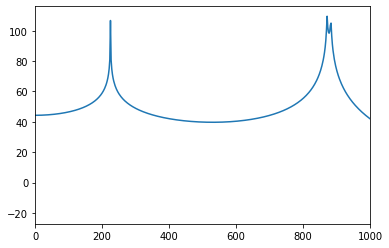

2


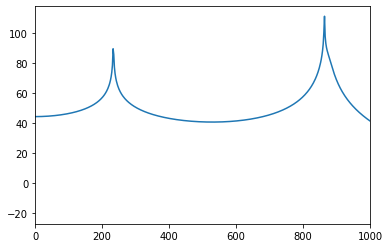

3


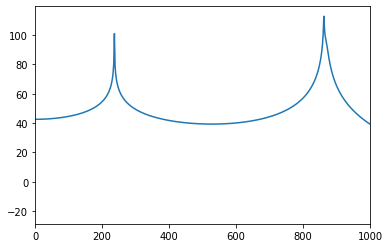

4


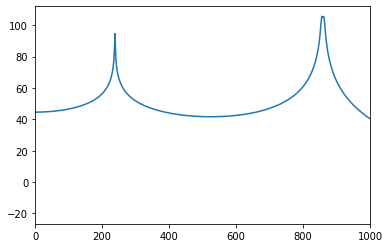

5


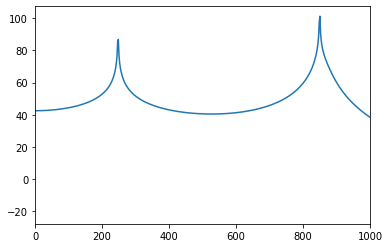

6


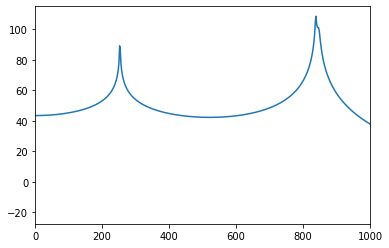

7


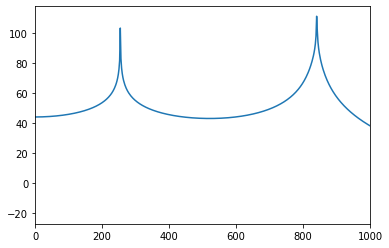

8


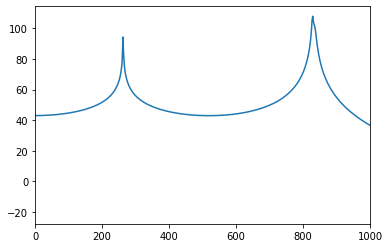

9


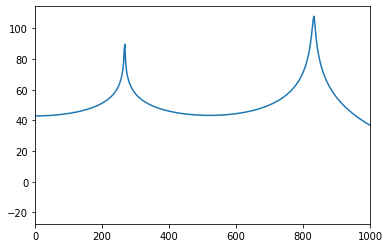

10


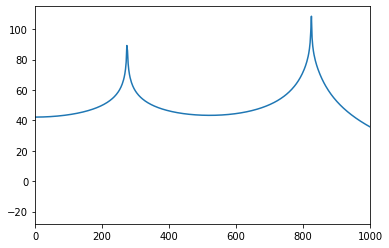

11


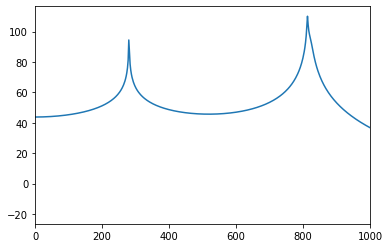

12


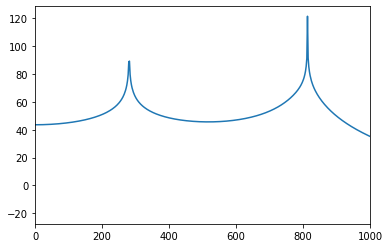

13


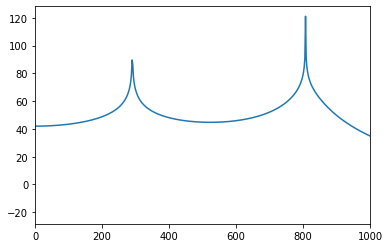

14


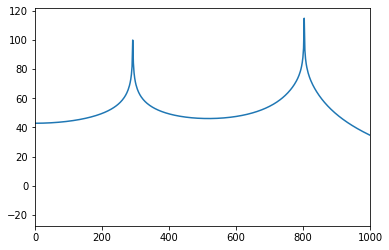

15


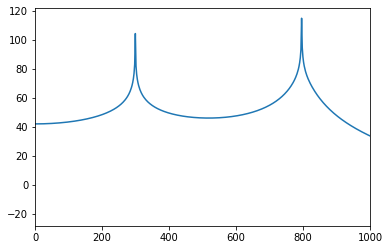

16


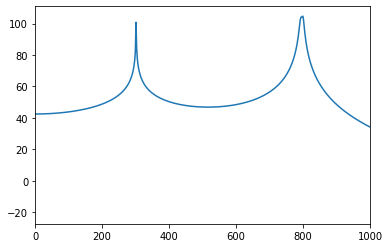

17


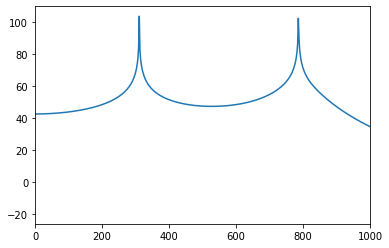

18


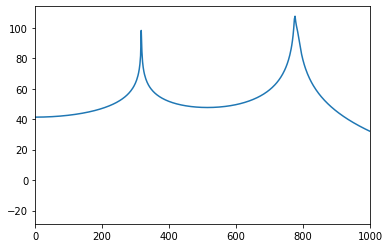

19


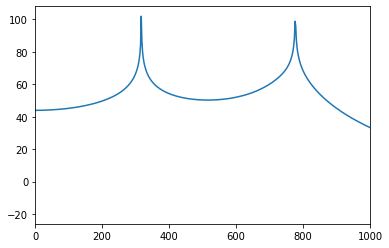

20


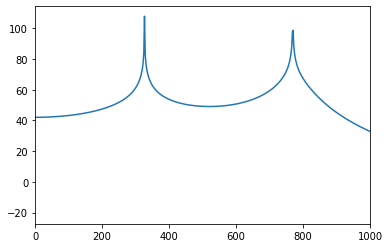

21


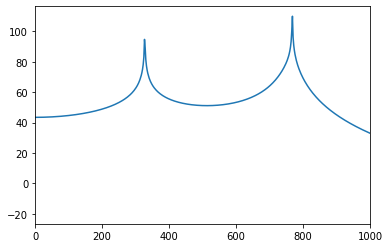

22


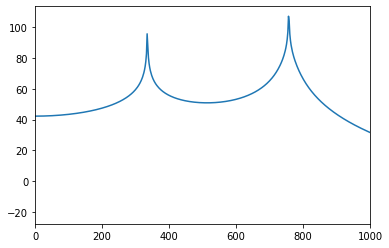

23


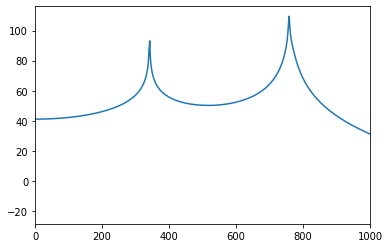

24


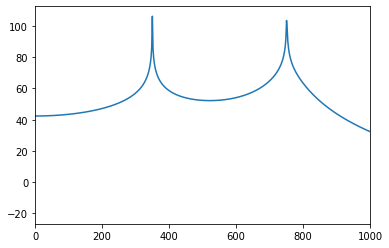

25


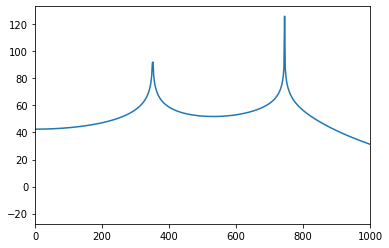

26


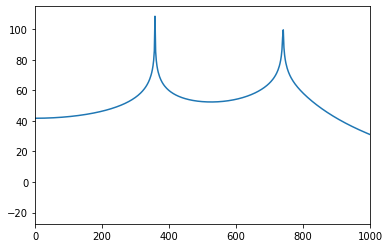

27


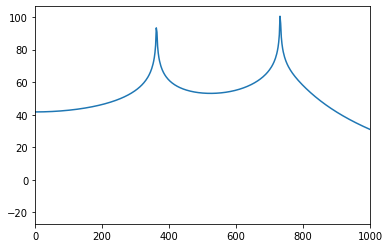

28


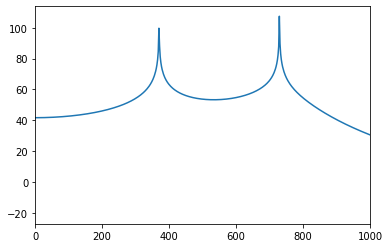

29


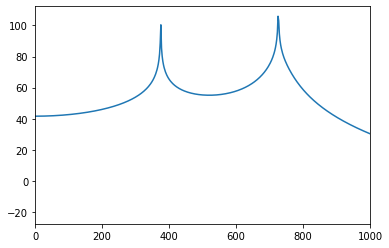

30


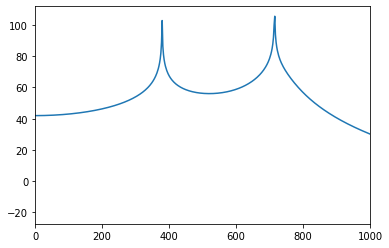

31


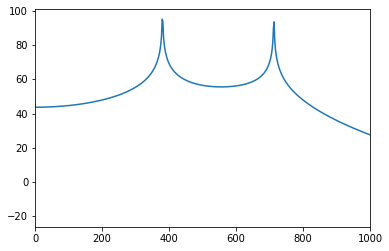

32


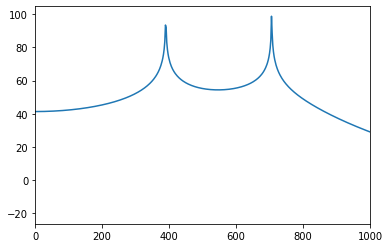

33


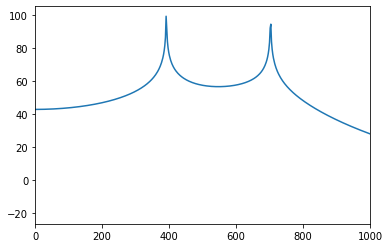

34


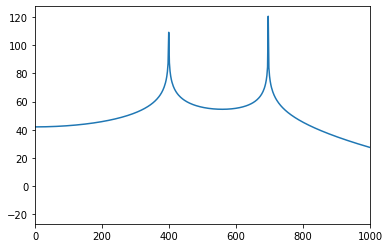

35


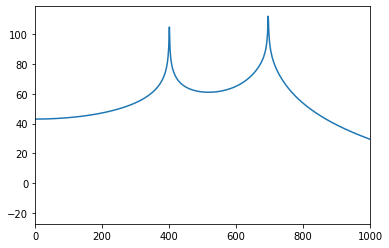

36


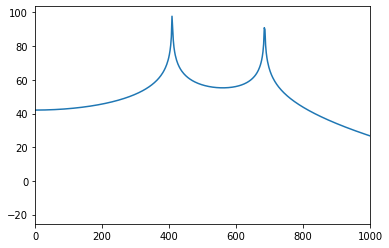

37


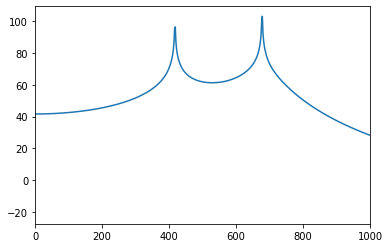

38


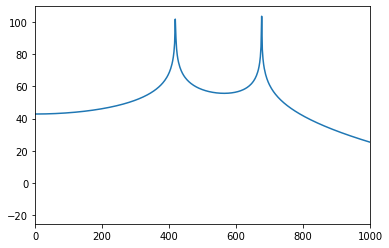

39


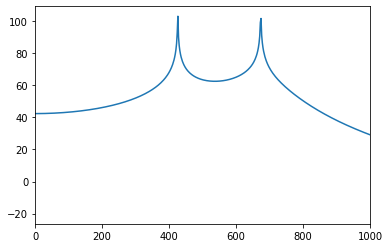

40


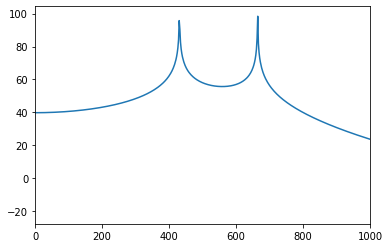

41


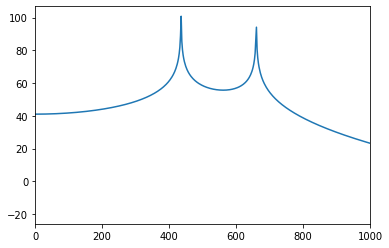

42


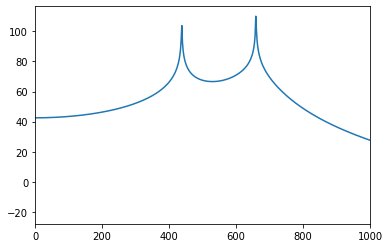

43


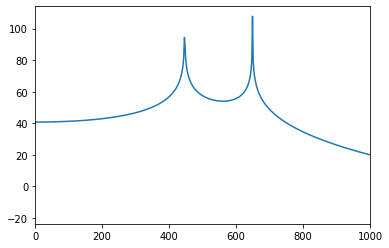

44


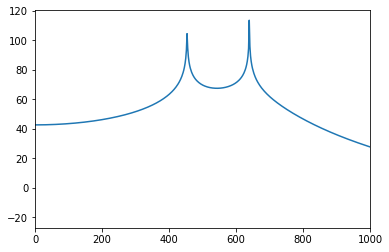

45


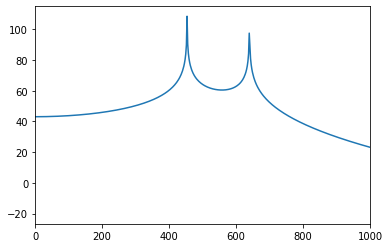

46


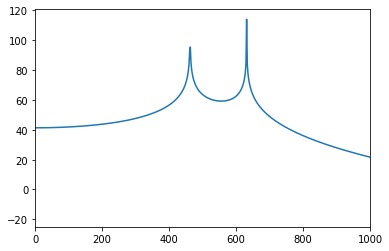

47


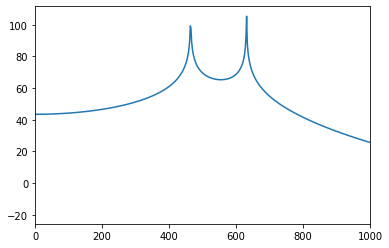

48


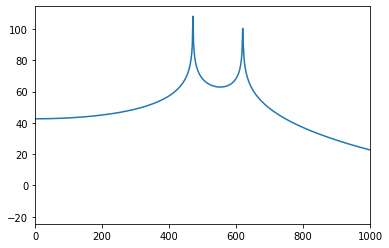

49


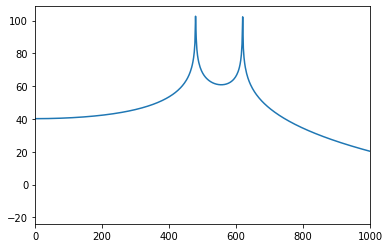

50


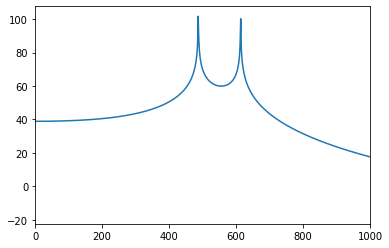

51


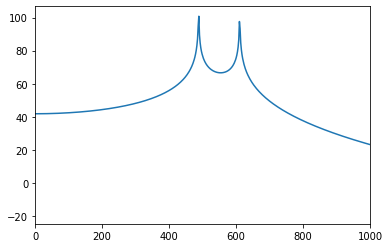

52


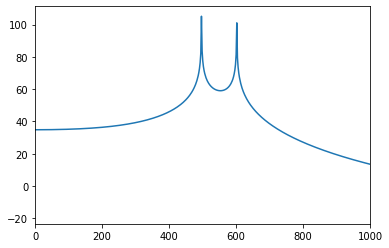

53


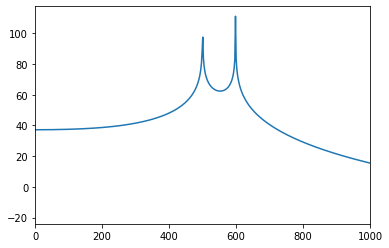

54


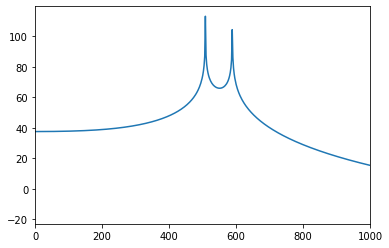

55


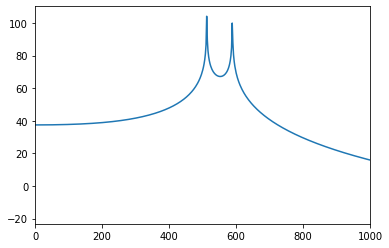

56


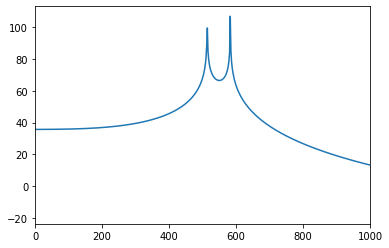

57


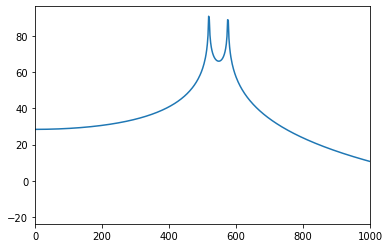

58


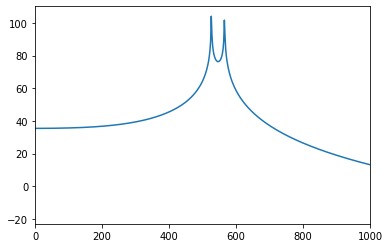

59


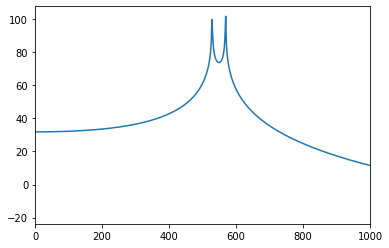

60


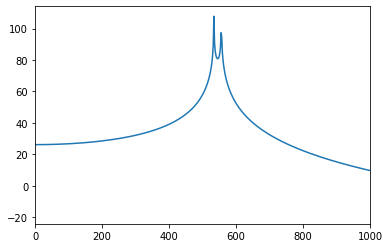

61


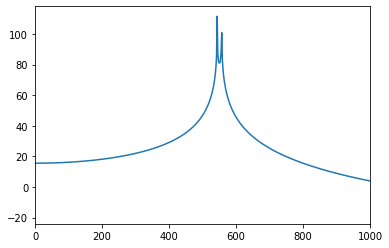

62


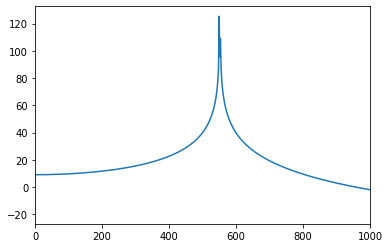

63


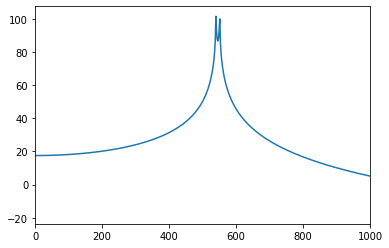

64


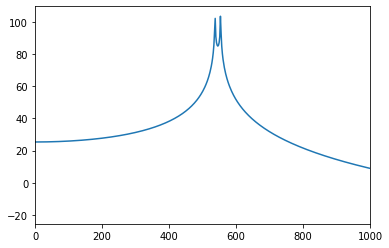

65


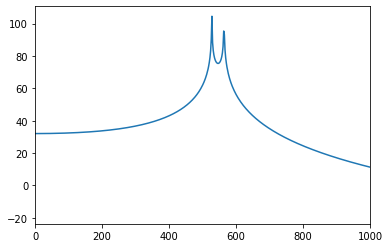

66


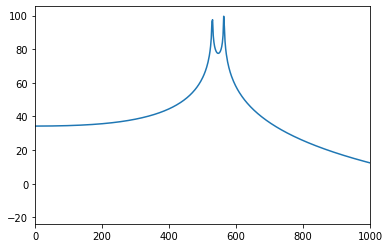

67


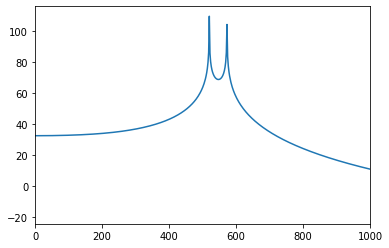

68


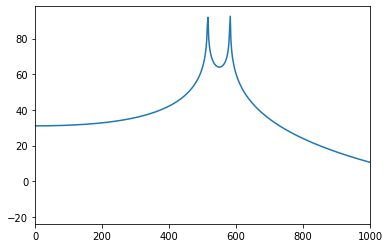

69


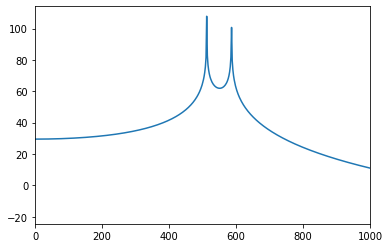

70


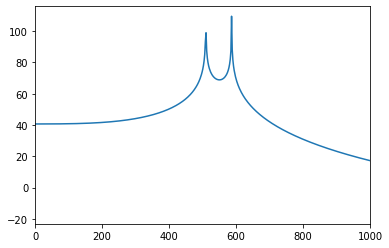

71


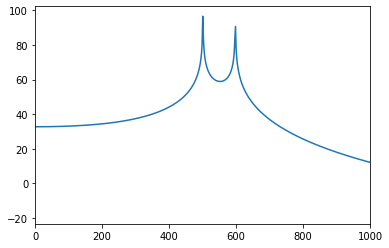

72


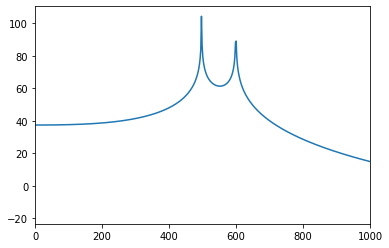

73


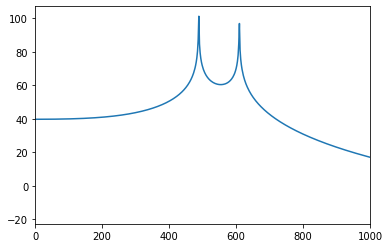

74


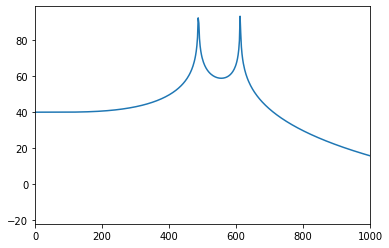

75


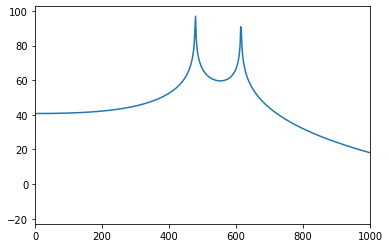

76


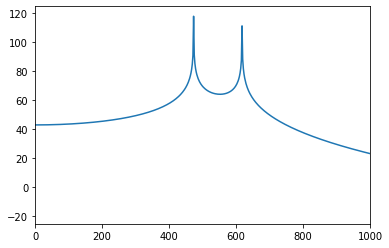

77


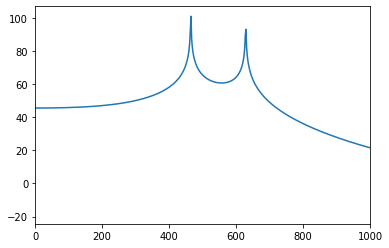

78


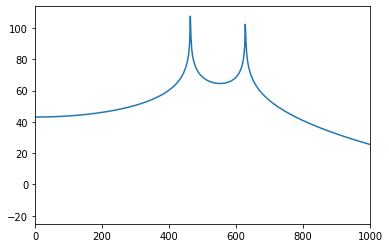

79


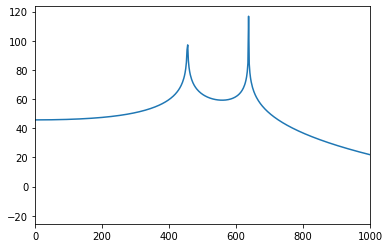

80


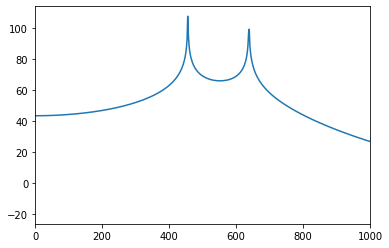

81


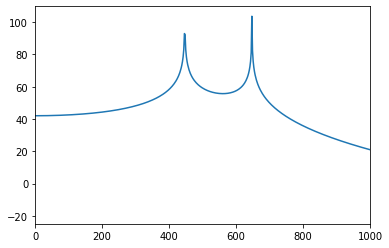

82


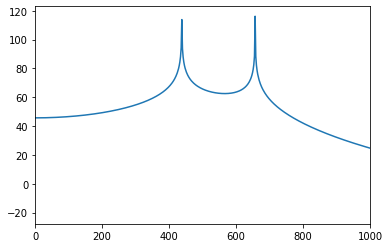

83


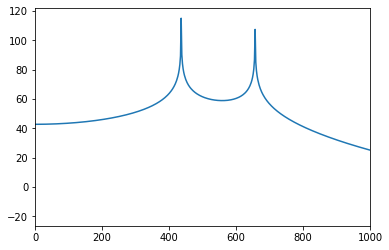

84


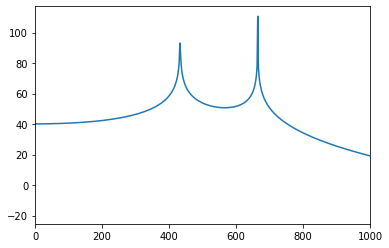

85


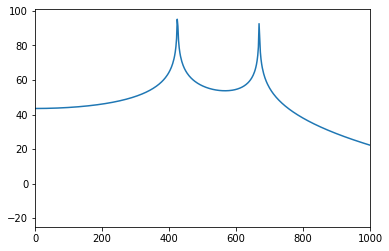

86


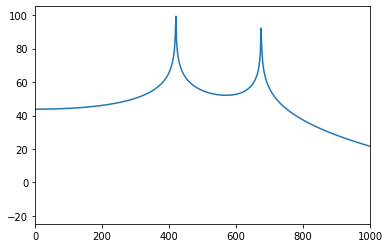

87


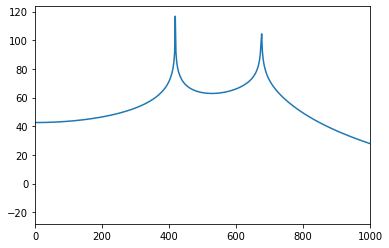

88


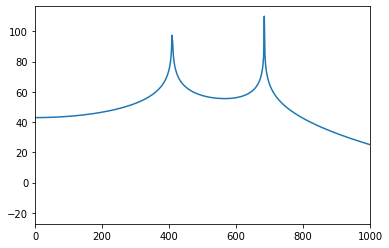

89


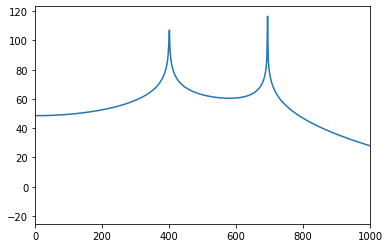

90


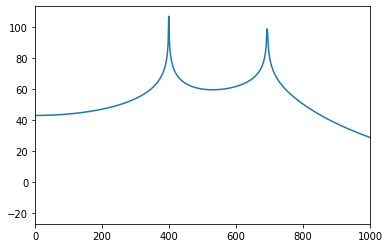

91


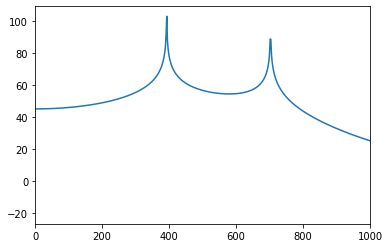

92


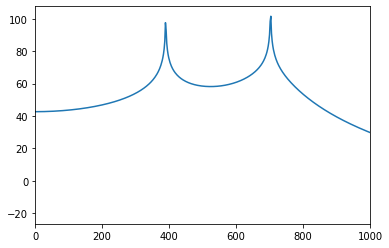

93


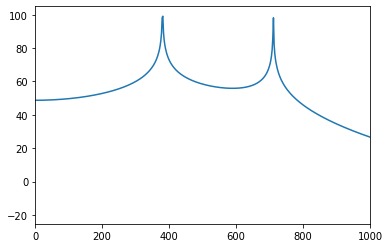

94


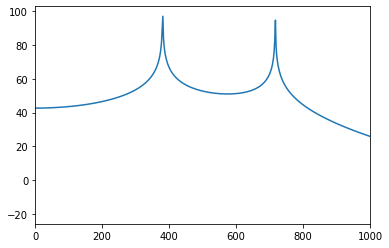

95


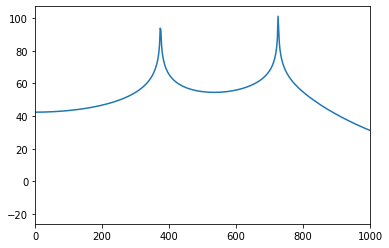

96


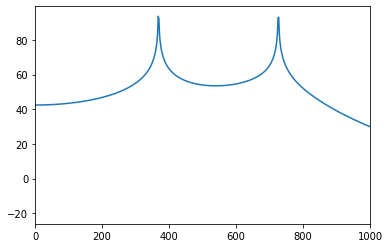

97


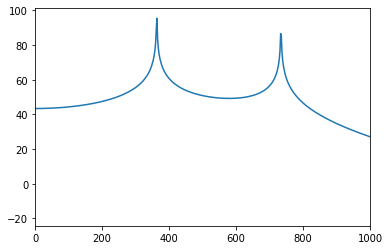

98


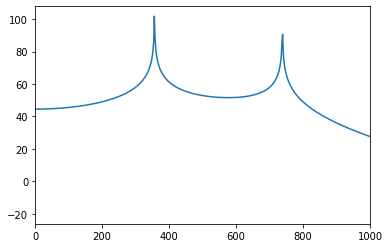

99


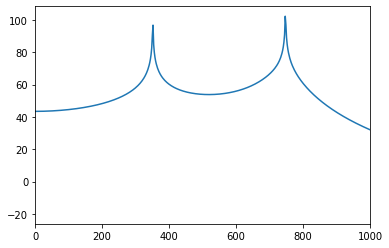

100


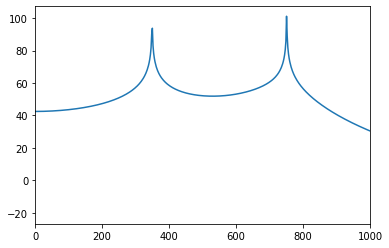

101


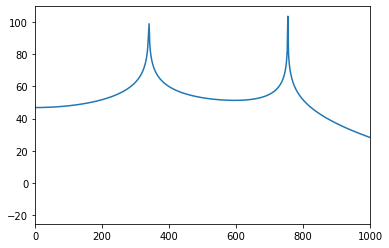

102


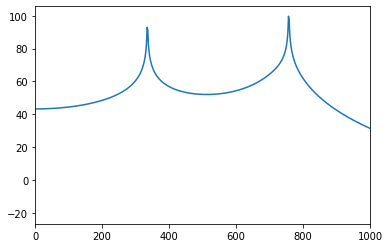

103


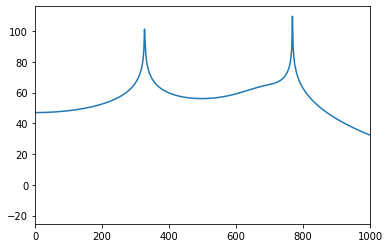

104


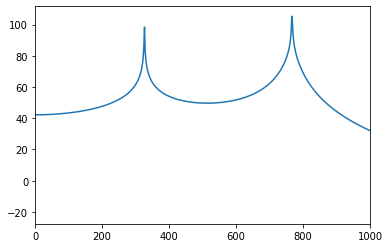

105


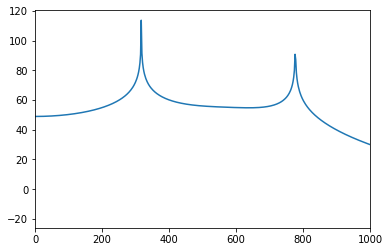

106


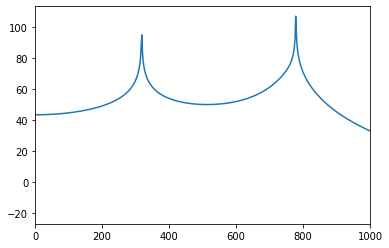

107


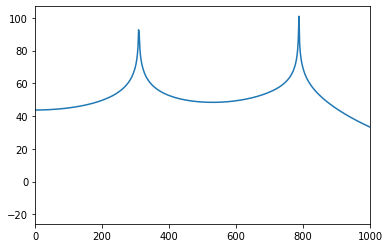

108


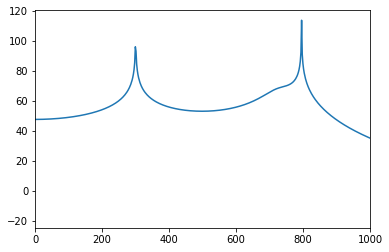

109


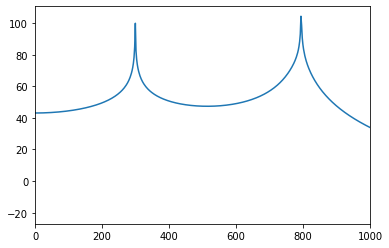

110


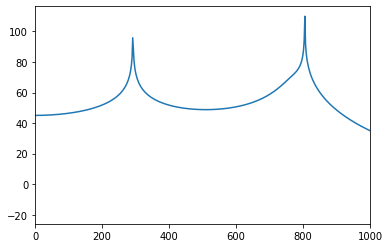

111


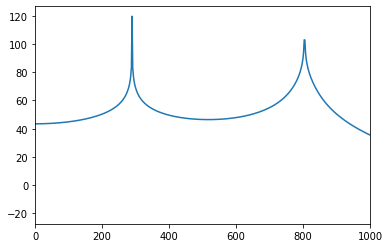

112


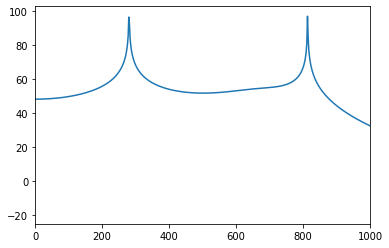

113


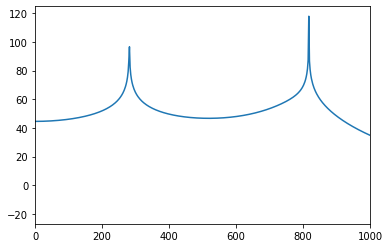

114


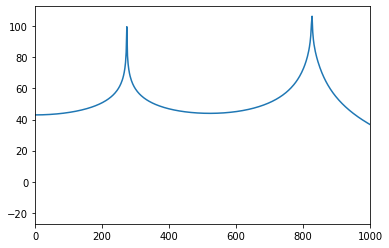

115


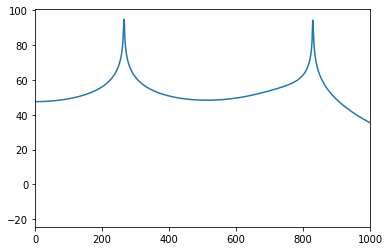

116


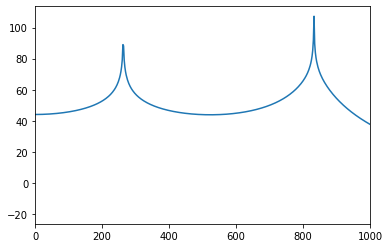

117


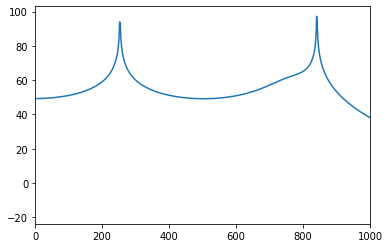

118


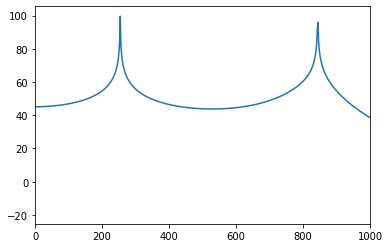

119


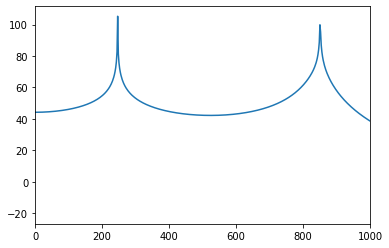

120


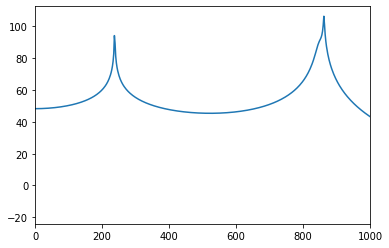

121


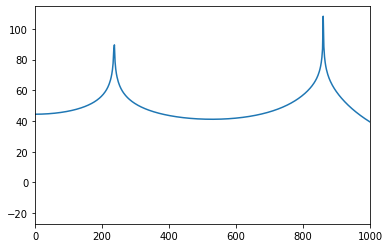

122


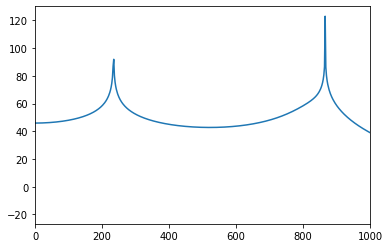

123


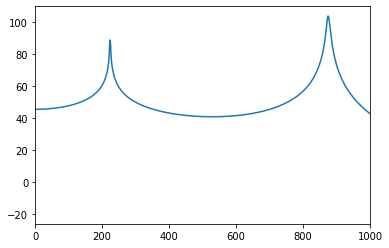

124


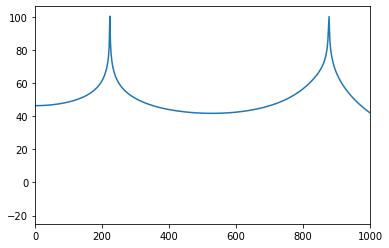

Frequencies Found


0           1           2
1  224.828935  871.945259  883.675464
2  232.649071  864.125122         NaN
3  236.559140  862.170088         NaN
4  238.514174  856.304985  862.170088
5  248.289345  850.439883         NaN



A total of 0  tranches could not be analysed, corresponding to  0.0  % of the total


In [ ]:
# Aplying the Burg algortihm
dic_peaks_burg = {}

for i in range(1, len(windows)):
  print(i)
  # Finding the autoregression
  AR, rho, ref = arburg(windows[i], 7)
  # Getting the Power Spectrum Distribution
  PSD = arma2psd(AR, rho=rho, NFFT=4096)
  PSD = PSD[len(PSD):len(PSD)//2:-1]
  # Plotting the result
  x_array = linspace(0, 1*samplerate/2, len(PSD))
  plt.xlim(0,1000)
  plt.plot(x_array, 10*log10(abs(PSD)*2./(2.*pi)))
  plt.show()
  # Recording the peaks
  max2, _ = signal.find_peaks(PSD, height=0)
  peaks2 = []
  for j in max2:
    peaks2.append(x_array[j])
  dic_peaks_burg[i] = peaks2

# Creating a DataFrame of the identified frequencies
df = pd.DataFrame(dic_peaks_burg.values(), dic_peaks_burg.keys())
print("Frequencies Found")
display(df.head())

# Displaying the number of tranches where we couldn't identify the two frequencies
num_lost = [i for i in dic_peaks_burg.values() if len(i) < 2]
print("\n\nA total of", len(num_lost), " tranches could not be analysed, corresponding to ", 
      round(len(num_lost)/len(dic_peaks_burg)*100, 2), " % of the total")


In [ ]:
## The algo is still the same of the previous cell. This code only makes
# visualisation easier

#@title Window slicing
def window_vis(i=1):
    # Finding the autoregression
    AR, rho, ref = arburg(windows[i], 7)
    # Getting the Power Spectrum Distribution
    PSD = arma2psd(AR, rho=rho, NFFT=4096)
    PSD = PSD[len(PSD):len(PSD)//2:-1]
    # Plotting the result
    x_array = linspace(0, 1*samplerate/2, len(PSD))
    plt.xlim(0,1000)
    plt.plot(x_array, 10*log10(abs(PSD)*2./(2.*pi)))
    plt.show()
    # Recording the peaks
    max2, _ = signal.find_peaks(PSD, height=0)
    peaks2 = []
    for j in max2:
      peaks2.append(x_array[j])
    


################################################################################
######################## Data presentation #####################################
################################################################################

button = wg.Button(
    description='Next',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
plot = wg.interactive(window_vis, i=(1, len(windows)))
def on_button_clicked(_):
    plot.children[0].value +=1
button.on_click(on_button_clicked)

display(plot)
display(button)

interactive(children=(IntSlider(value=1, description='i', max=125, min=1), Output()), _dom_classes=('widget-in…

Button(description='Next', icon='check', style=ButtonStyle(), tooltip='Click me')

In [ ]:
# Checking if the frequencies found are within the same range
# An interval of tolerance of 2,5% was considered
y = 0
n = 0

for i in range(1, len(dic_peaks_burg)):
  
  if len(dic_peaks_burg[i]) == 2 and len(dic_peaks_fft[i]) == 2:
    
    if dic_peaks_burg[i][0]*0.975 <= dic_peaks_fft[i][0] and dic_peaks_fft[i][0] <= dic_peaks_burg[i][0]*1.025:
      y +=  1
    else:
      n += 1
  else:
    continue

print("The interval was perceived in ",round(y/(y+n)*100, 2), " % of the tranches")

The interval was perceived in  96.12  % of the tranches


((array([458.0839499 , 916.41229856, 917.18278418, ..., 887.27570898,
       887.27943109, 443.64038165]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c1ff5e0>)
[1827 7189]


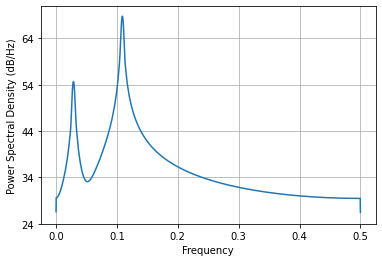

((array([ 18.05904652,  36.32916049,  36.96188608, ..., 647.04827927,
       647.05354618, 323.52769716]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b6ade20>)
[1827 7189]


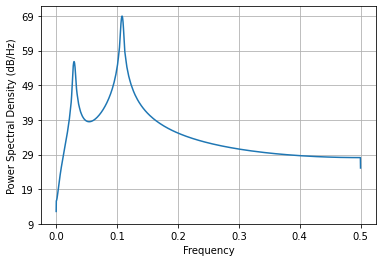

((array([ 86.85309159, 174.11101779, 175.31132898, ..., 871.05552068,
       871.02299195, 435.50594472]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c5a6f10>)
[1827 7189]


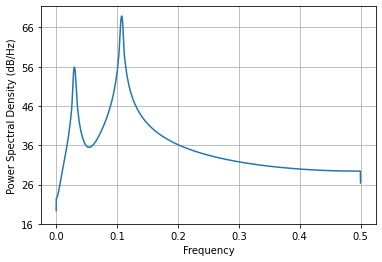

((array([432.45703005, 865.04869993, 865.41756968, ..., 182.46040625,
       182.45660723,  91.22765089]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b4c1640>)
[1827 7189]


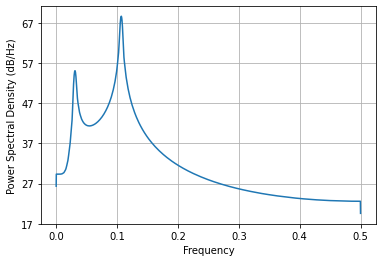

((array([ 509.7206995 , 1019.69165595, 1020.41601801, ...,  408.96313265,
        408.95288065,  204.47469314]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b6ade20>)
[1827 7189]


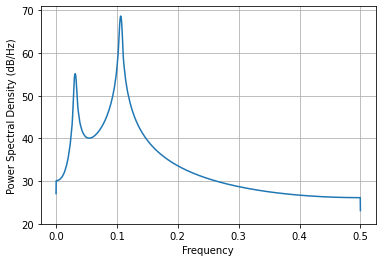

((array([ 55.23712811, 110.46330391, 110.42327085, ..., 164.75306346,
       164.74839351,  82.3734061 ]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b64a070>)
[1827 7189]


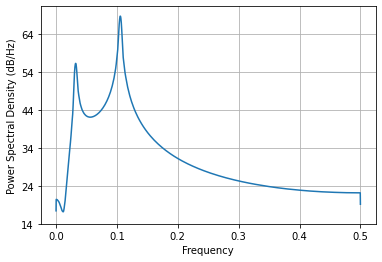

((array([413.85325824, 827.49756686, 826.90829147, ..., 106.5005228 ,
       106.49774543,  53.24840016]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b4fffd0>)
[1827 7189]


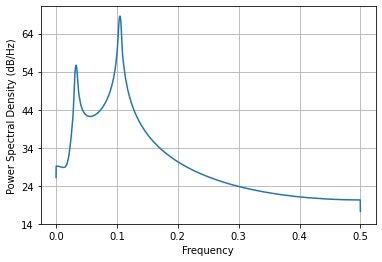

((array([115.9659726 , 231.78324336, 231.35202991, ...,  74.34986549,
        74.34836178,  37.17392225]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b64a070>)
[1827 7189]


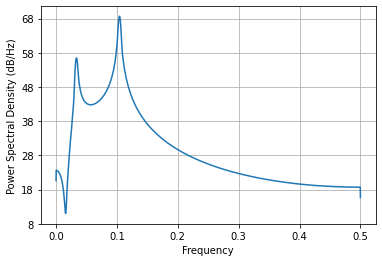

((array([ 541.61591455, 1083.63345365, 1084.80264212, ...,  689.33775893,
        689.31496423,  344.65358169]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b4ff850>)
[1827 7189]


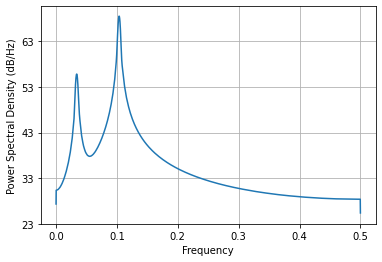

((array([ 558.11127947, 1116.44407734, 1117.10339611, ...,  580.16705349,
        580.15837837,  290.07769568]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c5738b0>)
[1827 7189]


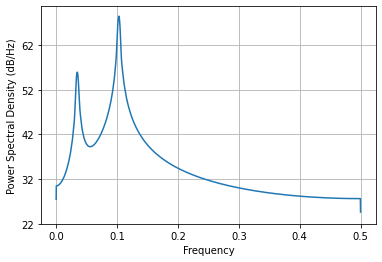

((array([ 16.85978147,  33.75851721,  33.87285461, ..., 322.64192253,
       322.65329342, 161.32860098]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b6268e0>)
[1827 7189]


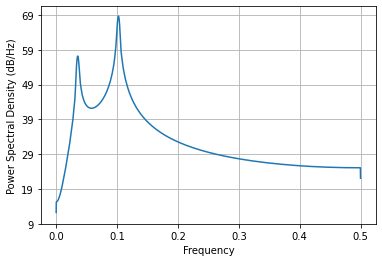

((array([161.74072459, 323.32006471, 322.85570347, ...,  45.34285882,
        45.34641778,  22.67381956]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b6bb430>)
[1827 7189]


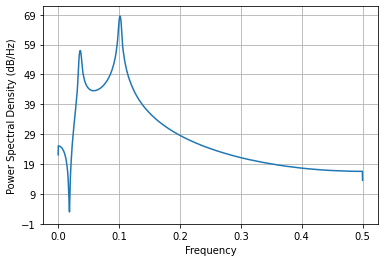

((array([ 80.30143843, 160.9038878 , 161.79818958, ..., 867.84570203,
       867.83599881, 433.91635267]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b4ce700>)
[1827 7189]


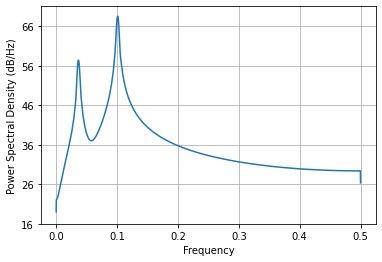

((array([130.28358772, 260.55467169, 260.50456538, ...,  83.82399678,
        83.82487303,  41.91258933]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f632d8c4490>)
[1827 7189]


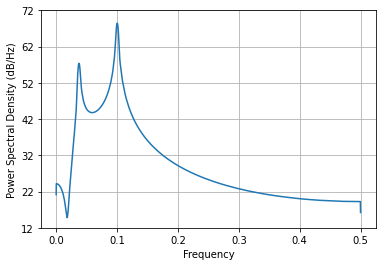

((array([  0.79572126,   1.68796063,   1.97398542, ..., 477.30687359,
       477.30020903, 238.64895574]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b557250>)
[1827 7189]


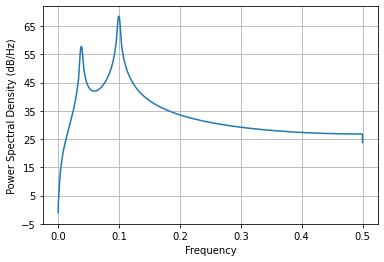

((array([ 583.11912317, 1166.19916135, 1166.10857135, ...,  335.88788723,
        335.88239635,  167.94026553]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c5fcd90>)
[1827 7189]


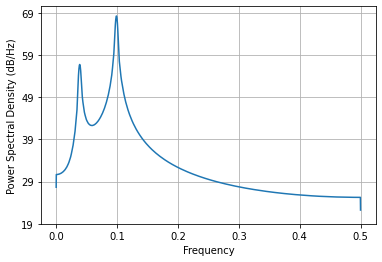

((array([ 596.0883302 , 1192.18633652, 1192.22958191, ...,  363.5385285 ,
        363.53758771,  181.76864713]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c2f9ca0>)
[1827 7189]


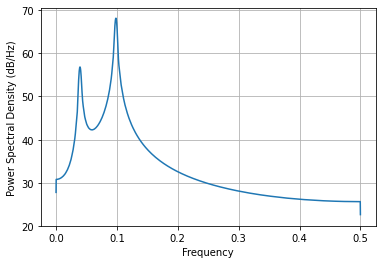

((array([ 11.46421373,  22.96660037,  23.08407843, ..., 387.54966755,
       387.54832494, 193.77393214]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c5b15e0>)
[1827 7189]


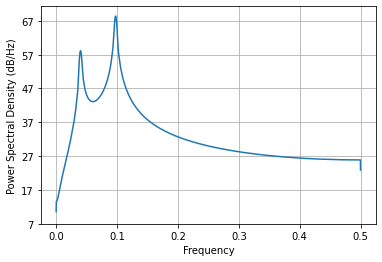

((array([231.6453656 , 463.29257076, 463.28182149, ...,  21.58800036,
        21.59017664,  10.7954595 ]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c3ab370>)
[1827 7189]


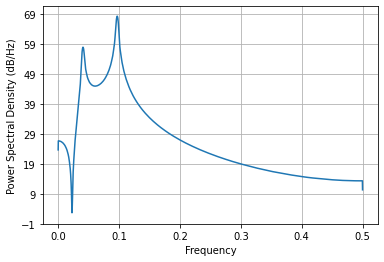

((array([ 14.07517192,  28.29523525,  28.73155352, ..., 683.38770366,
       683.39851418, 341.70112518]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c5bb370>)
[1827 7189]


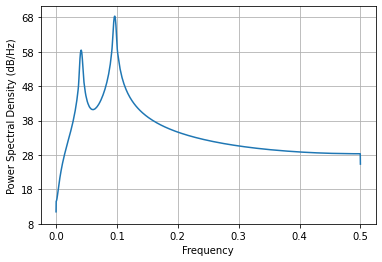

((array([364.84544344, 729.56330547, 729.19683687, ...,   2.31112364,
         2.31124007,   1.15564042]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b57d730>)
[1827 7189]


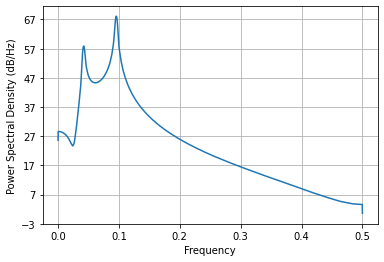

((array([170.11681007, 340.13704199, 339.85871131, ...,  75.4918108 ,
        75.49207974,  37.74610193]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c227d00>)
[1827 7189]


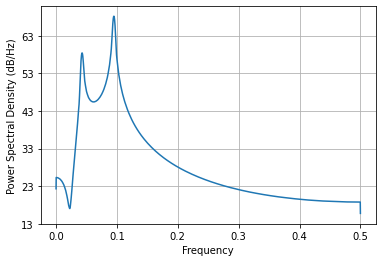

((array([ 521.25222958, 1042.83684963, 1043.81673135, ...,  896.32759281,
        896.32829522,  448.16425948]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c3f4730>)
[1827 7189]


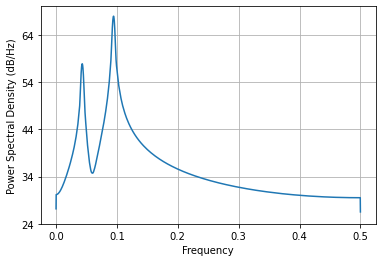

((array([429.73150631, 859.74302963, 860.58392274, ..., 981.39103397,
       981.39893374, 490.70080787]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b5ccaf0>)
[1827 7189]


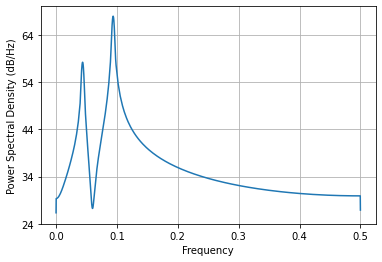

((array([498.74640787, 997.45444917, 997.34337267, ...,  47.44902914,
        47.44707207,  23.72320818]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b5f4460>)
[1827 7189]


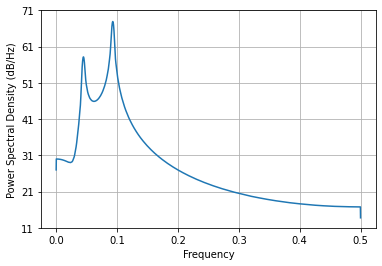

((array([ 664.60408054, 1329.29912278, 1329.58620743, ...,  593.04577193,
        593.05110895,  296.52648743]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c5bb670>)
[1827 7189]


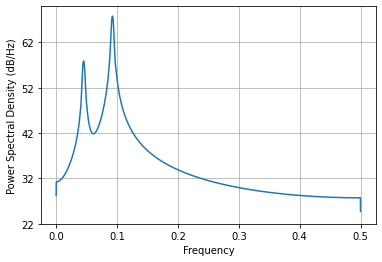

((array([ 500.97841129, 1001.90413815, 1001.7505295 , ...,   38.09915682,
         38.10035003,   19.05037901]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b611520>)
[1827 7189]


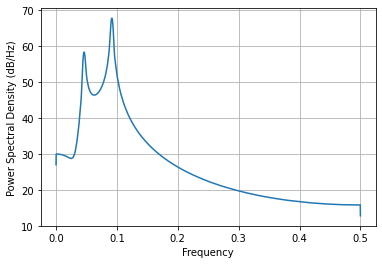

((array([469.9501417 , 940.21228192, 941.13782648, ..., 957.48007732,
       957.48652246, 478.7443359 ]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b5cc8b0>)
[1827 7189]


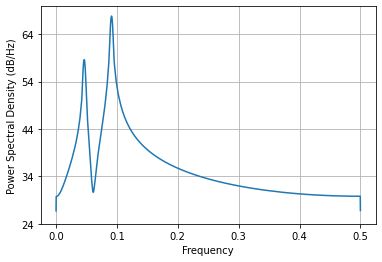

((array([ 584.42945536, 1169.08061738, 1169.74872881, ...,  840.53317812,
        840.53111314,  420.26521503]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c3ce400>)
[1827 7189]


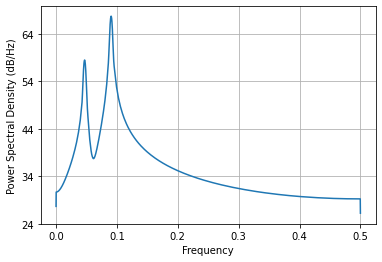

((array([149.0138275 , 298.01202146, 297.96527892, ..., 130.27929343,
       130.27882017,  65.13933456]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c48dca0>)
[1827 7189]


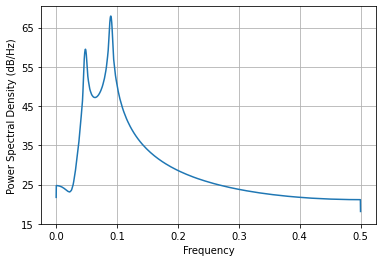

((array([354.5246396 , 708.96393837, 708.71871715, ...,   4.58064525,
         4.58171861,   2.29104196]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c694220>)
[1827 7189]


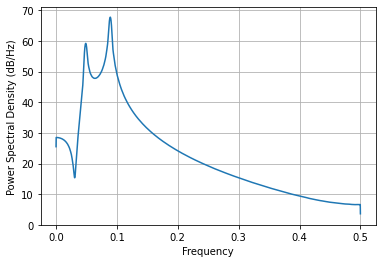

((array([ 41.9648435 ,  84.12108769,  84.69327499, ..., 795.25220126,
       795.2452151 , 397.62142436]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c40f400>)
[1827 7189]


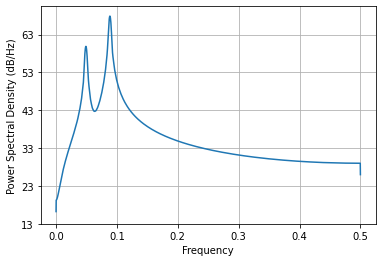

((array([199.16355016, 398.32565517, 398.31543927, ...,  91.53151957,
        91.53066491,  45.76518549]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c2d5bb0>)
[1827 7189]


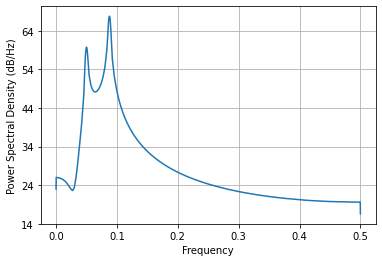

((array([9.98743101e-02, 3.09977436e-01, 6.39669746e-01, ...,
       5.63199363e+02, 5.63204876e+02, 2.81603397e+02]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b6267f0>)
[1827 7189]


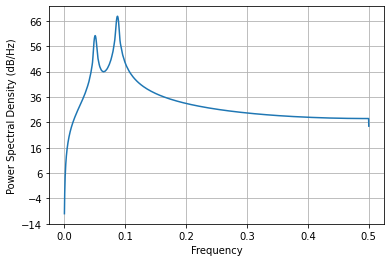

((array([ 693.74423369, 1387.4858695 , 1387.48805776, ...,  174.23043422,
        174.22213635,   87.10965721]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c21ca00>)
[1827 7189]


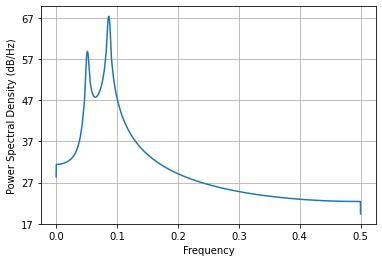

((array([ 681.33002175, 1362.64941803, 1362.62412847, ...,  136.61306303,
        136.61083722,   68.3050503 ]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c3dba00>)
[1827 7189]


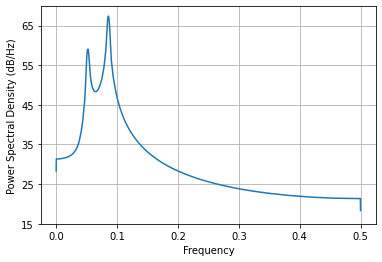

((array([ 13.62043085,  27.39566295,  27.85978675, ..., 710.63605547,
       710.62915914, 355.31336649]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631e44f910>)
[1827 7189]


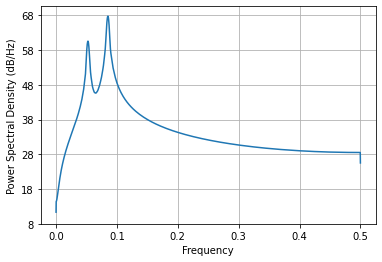

((array([ 70.35930614, 140.76495751, 140.90106117, ..., 286.66879227,
       286.66337484, 143.33078239]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c1cdbb0>)
[1827 7189]


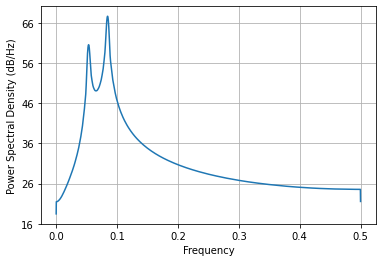

((array([238.8814579 , 477.98441334, 478.65328183, ..., 986.35347697,
       986.35234184, 493.17602949]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b545220>)
[1827 7189]


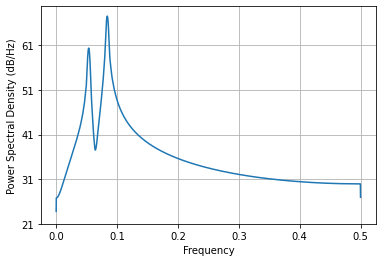

((array([ 90.82244318, 181.67198218, 181.75505725, ..., 257.78187967,
       257.78444478, 128.89265689]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c410160>)
[1827 7189]


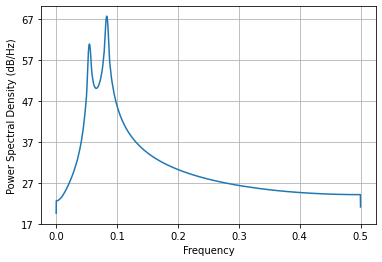

((array([  2.56089635,   5.25671933,   5.66162859, ..., 647.42579832,
       647.42634692, 323.71325881]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c4b07f0>)
[1827 7189]


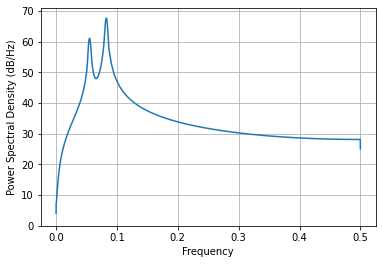

((array([ 782.07202658, 1564.23161347, 1564.48765157, ...,  208.6356724 ,
        208.63772568,  104.31922352]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b4b2fd0>)
[1827 7189]


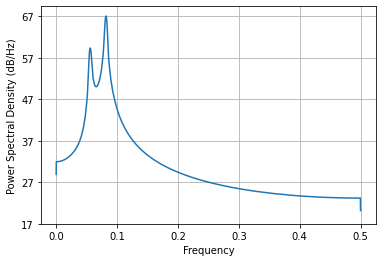

((array([ 816.04272306, 1632.18254381, 1632.47110978, ...,  280.29149749,
        280.28955421,  140.14444243]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b5b8ac0>)
[1827 7189]


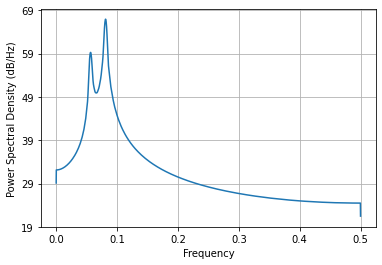

((array([ 34.64051039,  69.35733077,  69.58558856, ..., 397.33344969,
       397.32688434, 198.66232257]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631e44fdc0>)
[1827 7189]


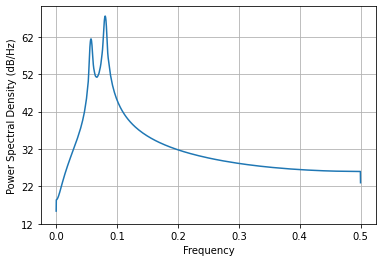

((array([420.09851667, 840.17352318, 840.10685909, ...,  12.5080318 ,
        12.50838753,   6.2542511 ]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b6269d0>)
[1827 7189]


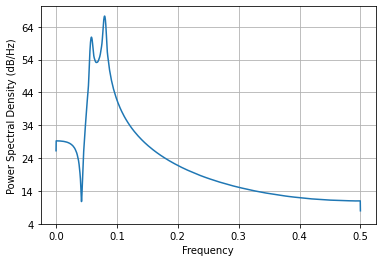

((array([  0.6271897 ,   1.37271501,   1.72814317, ..., 578.64138102,
       578.63784406, 289.31832101]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b691d00>)
[1827 7189]


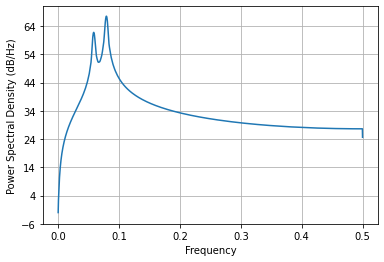

((array([ 686.05475845, 1372.12972491, 1372.18716534, ...,   35.9220122 ,
         35.92430534,   17.96254205]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b723550>)
[1827 7189]


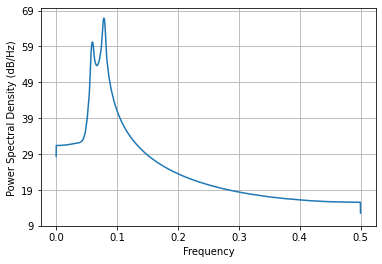

((array([476.8448955 , 953.68821363, 953.68304516, ...,   5.81333635,
         5.8137315 ,   2.90693286]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c6cebe0>)
[1827 7189]


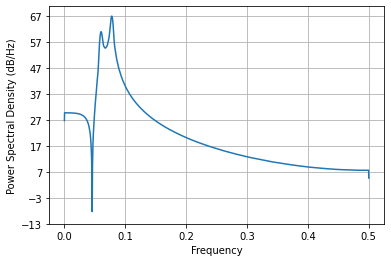

((array([432.6349802 , 865.5158677 , 866.25434091, ..., 982.17398724,
       982.17316811, 491.08643831]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b723490>)
[1827 7189]


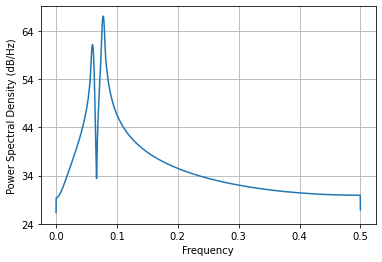

((array([244.19938386, 488.64624396, 489.38715933, ..., 976.79862902,
       976.79090287, 488.39415863]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c6ce0d0>)
[1827 7189]


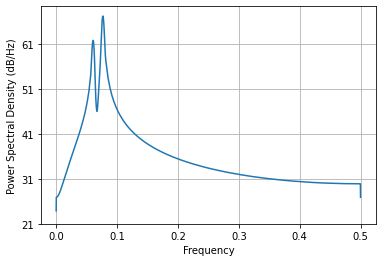

((array([ 916.00753552, 1832.12239878, 1832.44116177, ...,  300.26705085,
        300.2661161 ,  150.13289365]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631df91040>)
[1827 7189]


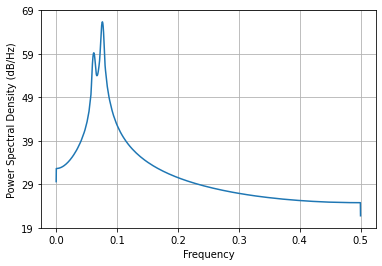

((array([ 608.49592397, 1217.23214858, 1217.9549364 , ...,  913.58654901,
        913.58007783,  456.78893418]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631e515b80>)
[1827 7189]


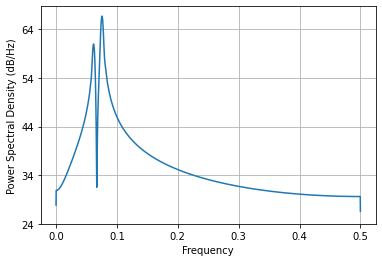

((array([ 946.51790643, 1893.15690205, 1893.5233108 , ...,  381.90598359,
        381.89542196,  190.94591508]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c46a9d0>)
[1827 7189]


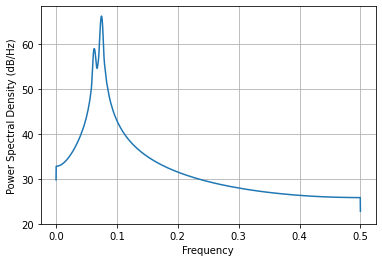

((array([118.00167912, 236.22827558, 236.90194588, ..., 905.09658126,
       905.08670372, 452.54169514]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c55afa0>)
[1827 7189]


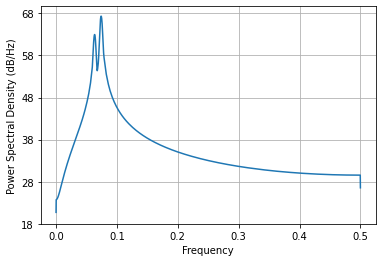

((array([213.5613348 , 427.36553924, 428.09350213, ..., 962.0538722 ,
       962.06955282, 481.03745378]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c5b1e80>)
[1827 7189]


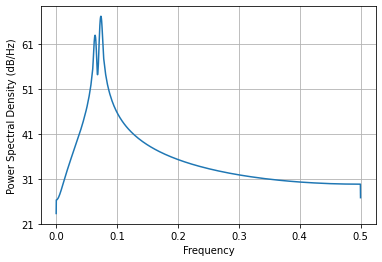

((array([ 856.8379705 , 1713.72441266, 1713.86839156, ...,   72.56034132,
         72.56057961,   36.2803302 ]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c237fd0>)
[1827 7189]


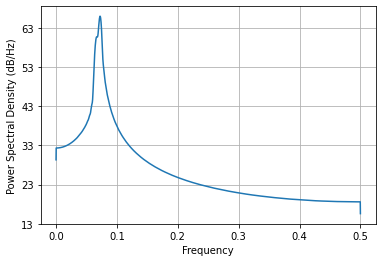

((array([1002.21829027, 2004.5468996 , 2004.88304859, ...,  342.29592787,
        342.29132901,  171.14489597]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b571c70>)
[1827 7189]


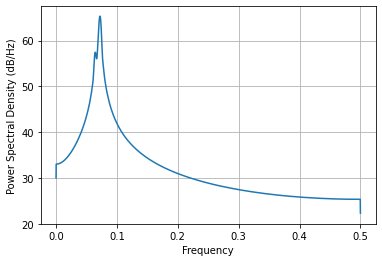

((array([312.83505889, 625.69030497, 625.75494419, ..., 110.74121597,
       110.73818397,  55.36856996]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b56bc40>)
[1827 7189]


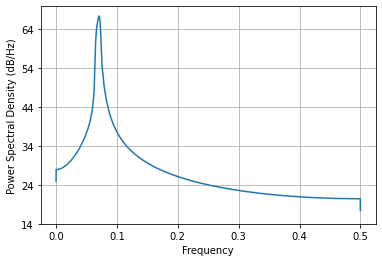

((array([1012.47066552, 2025.06697814, 2025.43873793, ...,  227.77188501,
        227.771234  ,  113.88549984]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b4a3190>)
[1827 7189]


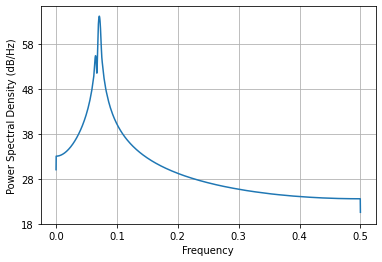

((array([6.95817216e+02, 1.39168955e+03, 1.39184830e+03, ...,
       3.02727015e-01, 3.02730206e-01, 1.51365899e-01]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c3d1430>)
[1827 7189]


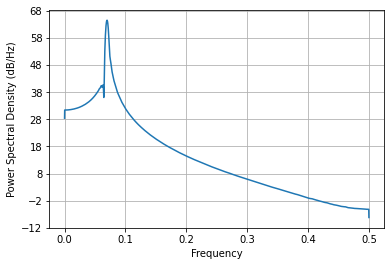

((array([ 606.22550927, 1212.6885778 , 1213.4071654 , ...,  936.65550786,
        936.65990435,  468.33072059]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b636670>)
[1827 7189]


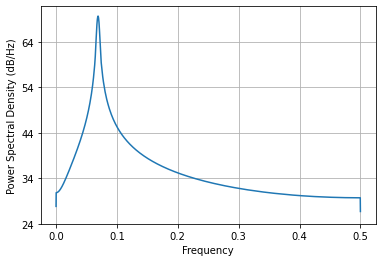

((array([ 608.30405479, 1216.86772106, 1217.65007826, ...,  937.79132436,
        937.78242961,  468.88971804]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c629c70>)
[1827 7189]


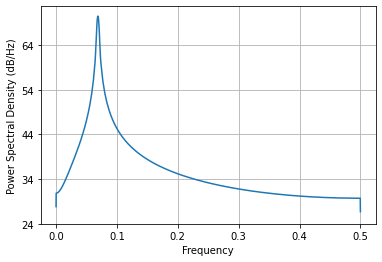

((array([7.48246685e+02, 1.49652788e+03, 1.49663546e+03, ...,
       7.90042361e-01, 7.89409138e-01, 3.94596765e-01]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b58ff10>)
[1827 7189]


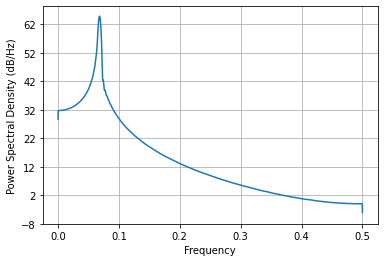

((array([1100.89256797, 2201.96870113, 2202.50749381, ...,  242.38307266,
        242.38118804,  121.19029979]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c5efd60>)
[1827 7189]


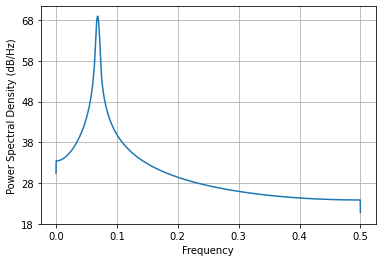

((array([396.43303876, 792.94855031, 793.18811199, ...,  95.07676881,
        95.07818385,  47.53933209]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c275ca0>)
[1827 7189]


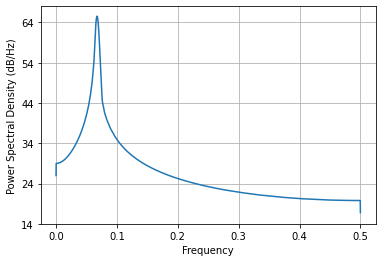

((array([1147.58827699, 2295.29340986, 2295.65506168, ...,  372.03618111,
        372.03944823,  186.02029357]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b6d4eb0>)
[1827 7189]


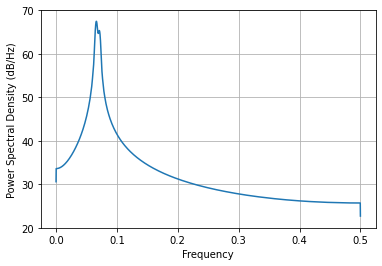

((array([1066.27673662, 2132.58886964, 2132.70830008, ...,   93.90508755,
         93.9064239 ,   46.95344324]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b62d2e0>)
[1827 7189]


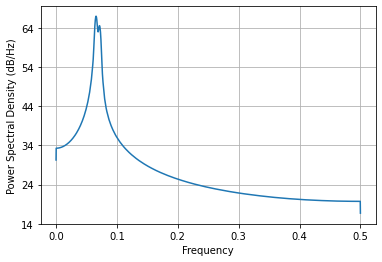

((array([182.08503452, 364.46226876, 365.33387435, ..., 940.14865281,
       940.14681381, 470.07310018]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f632d8bf550>)
[1827 7189]


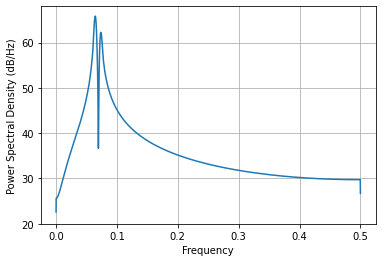

((array([ 80.00006865, 160.2476559 , 160.99017138, ..., 867.03752168,
       867.02212437, 433.50841715]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c3151c0>)
[1827 7189]


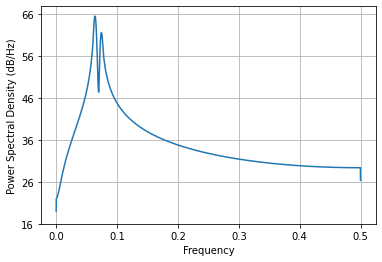

((array([1209.20850815, 2418.59052494, 2419.11418654, ...,  439.44703605,
        439.45154915,  219.72652447]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631df7d370>)
[1827 7189]


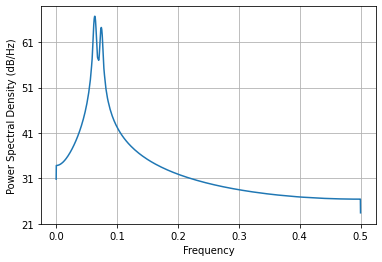

((array([ 661.91695346, 1324.09409012, 1324.8857527 , ...,  938.8591551 ,
        938.85196032,  469.42477261]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b4ede20>)
[1827 7189]


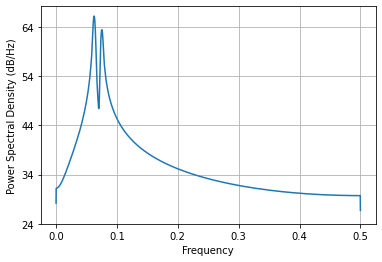

((array([1266.45250471, 2533.07337948, 2533.58632271, ...,  368.39018808,
        368.40203197,  184.20305831]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631e4eaca0>)
[1827 7189]


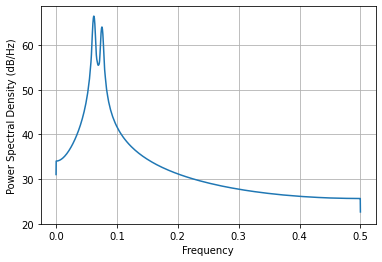

((array([191.2203963 , 382.76036263, 383.7129678 , ..., 941.72825934,
       941.72100703, 470.85929716]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b650610>)
[1827 7189]


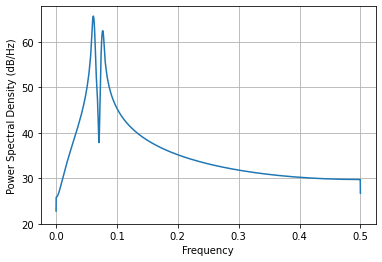

((array([425.13318531, 850.57930207, 851.51819223, ..., 981.30240923,
       981.30103985, 490.6503028 ]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b46d9d0>)
[1827 7189]


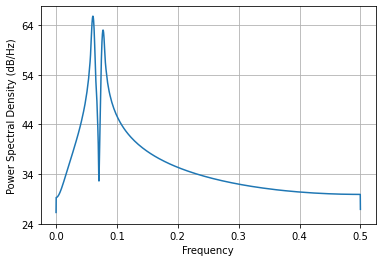

((array([9.49640897e+02, 1.89937865e+03, 1.89966605e+03, ...,
       4.68786242e-01, 4.68767893e-01, 2.34380533e-01]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b6505b0>)
[1827 7189]


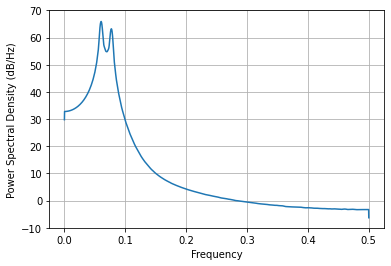

((array([1252.06054227, 2504.15636426, 2504.28651353, ...,   83.94487679,
         83.94252098,   41.97086651]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b572820>)
[1827 7189]


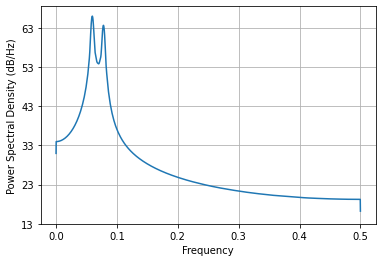

((array([ 72.16942588, 144.48725163, 144.94054705, ..., 460.84307532,
       460.84163285, 230.42058613]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b656550>)
[1827 7189]


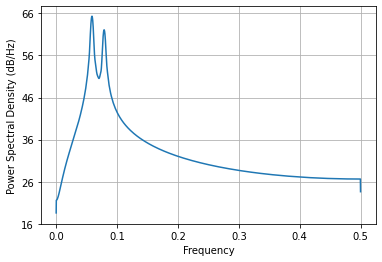

((array([9.96423913e+02, 1.99303218e+03, 1.99357003e+03, ...,
       5.73152710e-02, 5.73436645e-02, 2.86765161e-02]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c1cd130>)
[1827 7189]


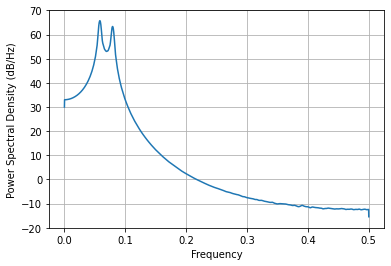

((array([255.1234475 , 510.45196207, 511.05267119, ..., 273.74397021,
       273.73670695, 136.86712346]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c5730d0>)
[1827 7189]


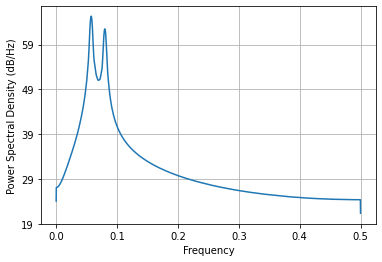

((array([1452.55671497, 2905.26198925, 2905.7309176 , ...,  401.30428039,
        401.29863588,  200.64834635]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631df9a1f0>)
[1827 7189]


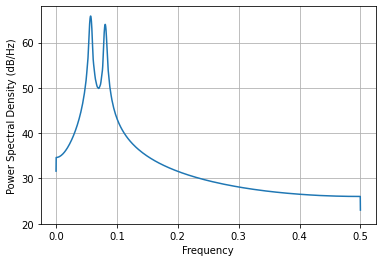

((array([1498.81806346, 2997.75686697, 2998.14865792, ...,  328.31691966,
        328.31134571,  164.15473592]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b502820>)
[1827 7189]


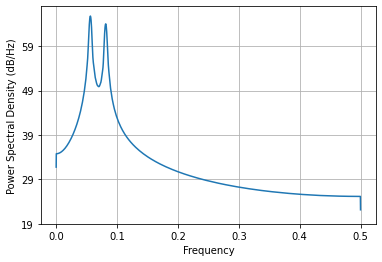

((array([ 68.53937547, 137.25801789, 137.80536619, ..., 492.29418344,
       492.28927227, 246.14380712]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f6330122b80>)
[1827 7189]


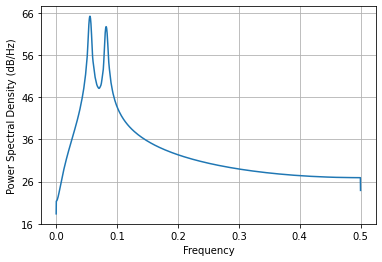

((array([ 536.94582042, 1074.10569037, 1074.73397493, ...,  132.76253965,
        132.76452426,   66.38260501]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c6fbbb0>)
[1827 7189]


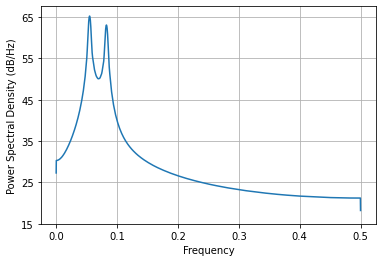

((array([127.44733081, 255.2057434 , 256.14607667, ..., 908.0511836 ,
       908.03437801, 454.01432628]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f6330122b80>)
[1827 7189]


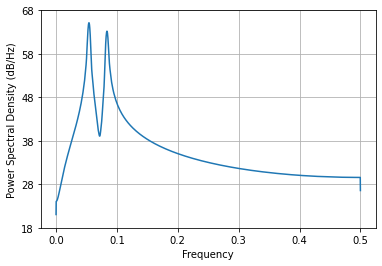

((array([ 541.86176042, 1083.87247725, 1084.32216479, ...,  144.84380011,
        144.8449051 ,   72.42264211]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c237dc0>)
[1827 7189]


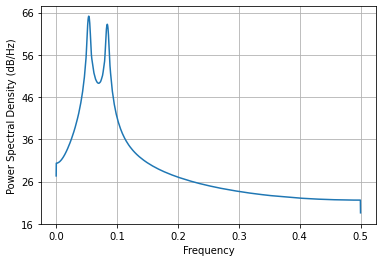

((array([ 59.06884224, 118.35520665, 119.01779596, ..., 528.63350506,
       528.64226605, 264.32261472]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c5b1a90>)
[1827 7189]


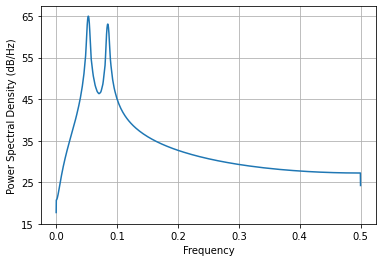

((array([1697.47273815, 3395.36636281, 3396.60395001, ...,  280.43518593,
        280.44455272,  140.22388031]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b6d4250>)
[1827 7189]


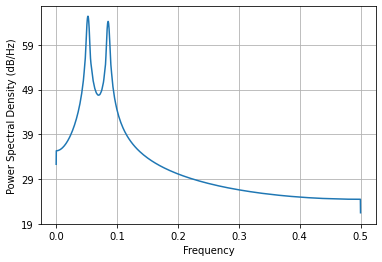

((array([1725.91815326, 3452.34713429, 3453.83434919, ...,  334.25550631,
        334.26290048,  167.13270371]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c335dc0>)
[1827 7189]


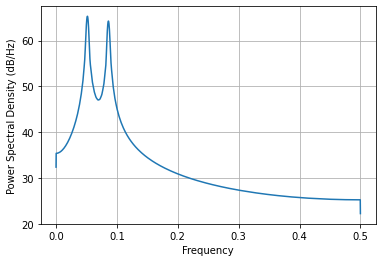

((array([238.96064885, 478.23964003, 479.17417085, ..., 356.19815857,
       356.19371411, 178.0961189 ]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c1cd670>)
[1827 7189]


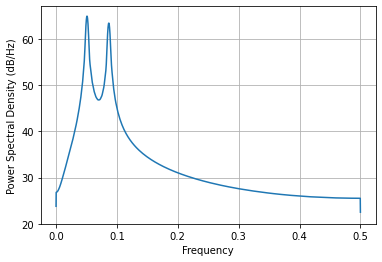

((array([1159.04977487, 2318.16690226, 2318.40036789, ...,    9.6545633 ,
          9.65374238,    4.82673394]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b51c280>)
[1827 7189]


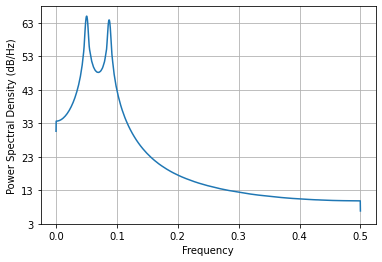

((array([ 40.66815924,  81.61017519,  82.44439282, ..., 584.48991583,
       584.49514122, 292.24848764]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c227760>)
[1827 7189]


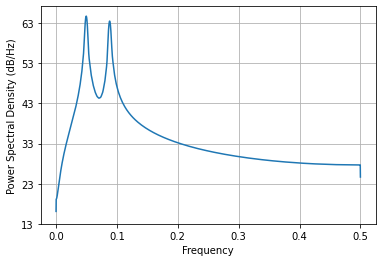

((array([1630.82392203, 3262.05557484, 3263.25098235, ...,   23.25401418,
         23.25485811,   11.62757013]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c237d60>)
[1827 7189]


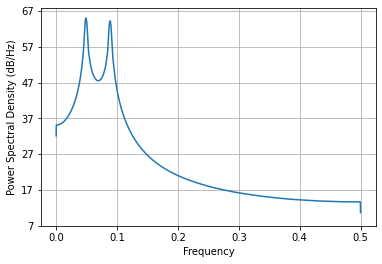

((array([1184.81168741, 2370.10139725, 2371.48104538, ...,   18.81361936,
         18.81373666,    9.40688821]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b4864c0>)
[1827 7189]


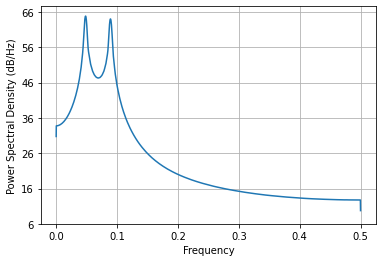

((array([ 868.79345627, 1737.92997333, 1738.99825451, ...,  951.4626221 ,
        951.4676171 ,  475.73467024]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b51c9a0>)
[1827 7189]


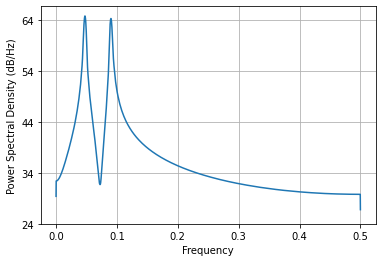

((array([ 509.22762726, 1018.93658568, 1020.39331034, ...,  986.03251068,
        986.02053382,  493.00822439]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b487d60>)
[1827 7189]


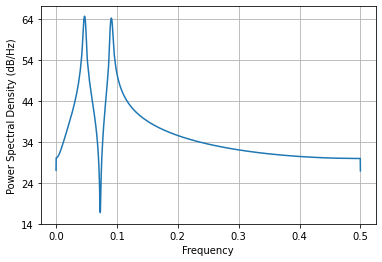

((array([2079.85892707, 4160.07519916, 4161.16390847, ...,  182.92201255,
        182.91861088,   91.45872599]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c5bb430>)
[1827 7189]


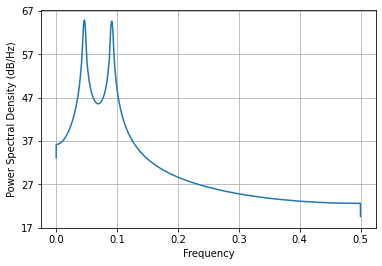

((array([1452.22542924, 2905.29502263, 2907.76604488, ...,  805.14666496,
        805.14484354,  402.5721357 ]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c3417c0>)
[1827 7189]


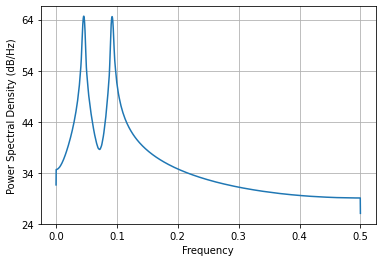

((array([2198.52396268, 4397.72369615, 4399.69695068, ...,  212.97064498,
        212.96917319,  106.48433235]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c68b4c0>)
[1827 7189]


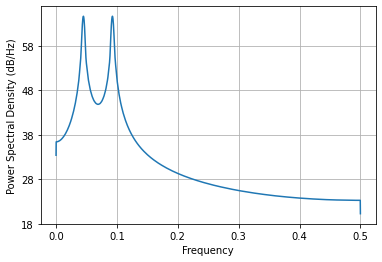

((array([401.61719287, 803.68246947, 805.0575173 , ..., 981.03217745,
       981.02135299, 490.50883256]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c3abfd0>)
[1827 7189]


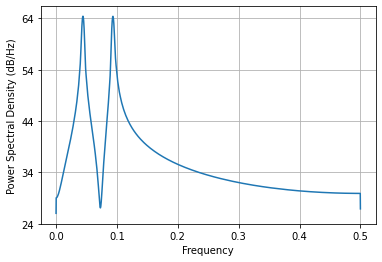

((array([ 715.53270711, 1431.68946709, 1433.569309  , ...,  983.46170635,
        983.46031821,  491.72995312]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c741430>)
[1827 7189]


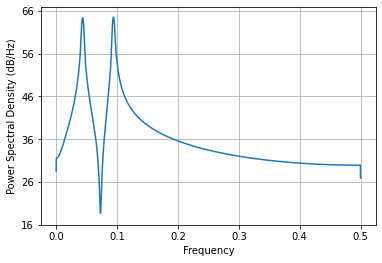

((array([1.84053921e+03, 3.68141186e+03, 3.68244134e+03, ...,
       1.21698045e-01, 1.21724536e-01, 6.08671025e-02]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c3415b0>)
[1827 7189]


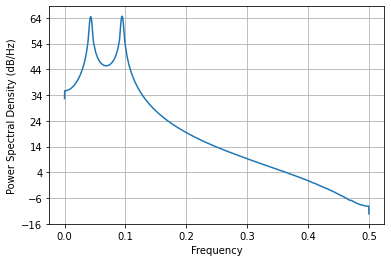

((array([2384.49655801, 4769.99540988, 4772.89594005, ...,  111.17475272,
        111.17343362,   55.58648752]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631e446b80>)
[1827 7189]


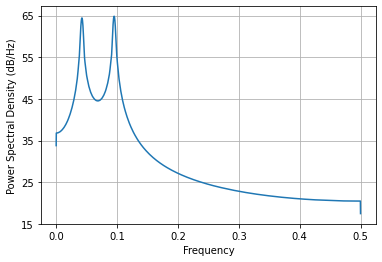

((array([405.52108083, 811.7339864 , 813.75422272, ..., 367.37782782,
       367.37022679, 183.68382175]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c626400>)
[1827 7189]


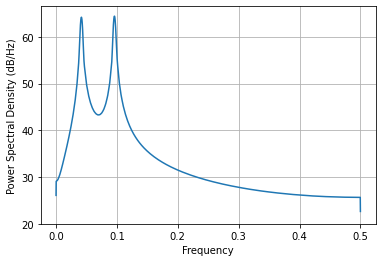

((array([2314.88279834, 4629.96964334, 4630.65467472, ...,   26.1799138 ,
         26.18301932,   13.09203821]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c49bca0>)
[1827 7189]


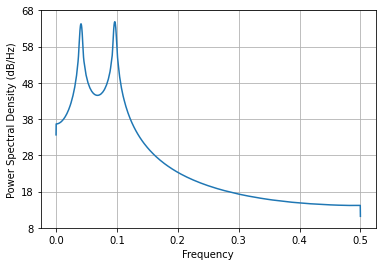

((array([1187.75901977, 2375.61893057, 2376.0177023 , ...,  114.3268336 ,
        114.32170293,   57.15997767]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c5731f0>)
[1827 7189]


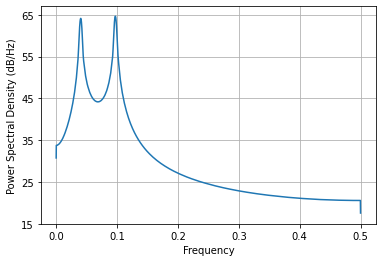

((array([2193.47892745, 4388.23147814, 4391.95616602, ...,  665.63724563,
        665.6319187 ,  332.81505834]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b71c5b0>)
[1827 7189]


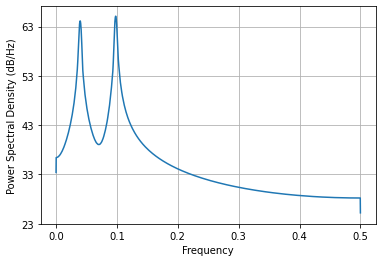

((array([2302.16250916, 4605.59293176, 4609.29846154, ...,  646.16454347,
        646.16552551,  323.08295081]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c573100>)
[1827 7189]


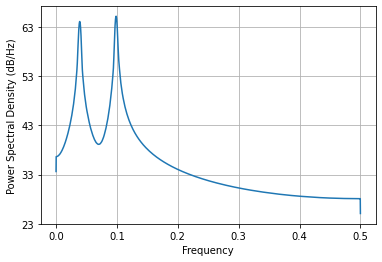

((array([1143.44935008, 2287.82651274, 2290.5245497 , ...,  158.6209373 ,
        158.62195938,   79.31114476]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c6fb0d0>)
[1827 7189]


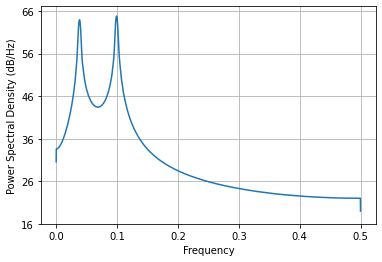

((array([2.51035701e+03, 5.02085657e+03, 5.02140871e+03, ...,
       3.05605429e+00, 3.05558269e+00, 1.52771143e+00]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c5c00a0>)
[1827 7189]


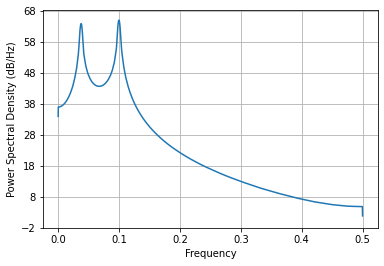

((array([252.33834196, 505.15403283, 506.65195374, ..., 518.31005023,
       518.31196829, 259.15630129]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b712520>)
[1827 7189]


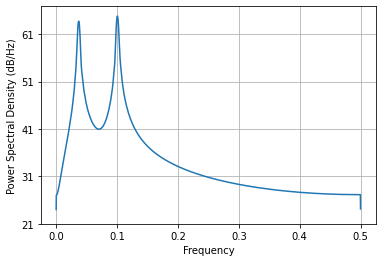

((array([2895.70492291, 5792.66981116, 5796.36526905, ...,   21.7199082 ,
         21.71906978,   10.85938869]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c6a5040>)
[1827 7189]


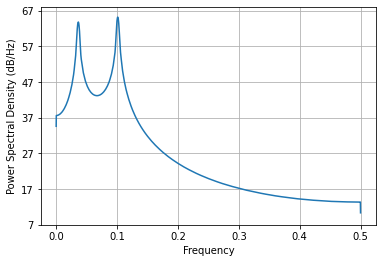

((array([1965.75268553, 3933.00615521, 3937.3411201 , ...,   49.78438423,
         49.78241058,   24.89086386]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b5fc430>)
[1827 7189]


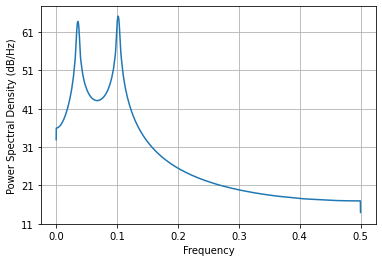

((array([1854.17141939, 3708.92870508, 3710.81369269, ...,  878.96616345,
        878.9634414 ,  439.48126633]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631e531f40>)
[1827 7189]


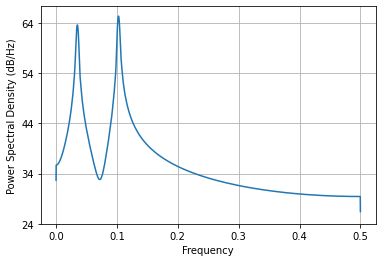

((array([1497.37564313, 2995.65558585, 2998.45376051, ...,  943.21411948,
        943.2111329 ,  471.60504905]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c2d50a0>)
[1827 7189]


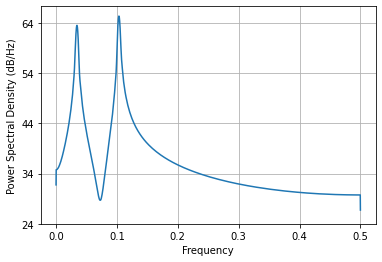

((array([3296.20782749, 6593.04580214, 6595.06920136, ...,   13.79603741,
         13.7964364 ,    6.8982877 ]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b729df0>)
[1827 7189]


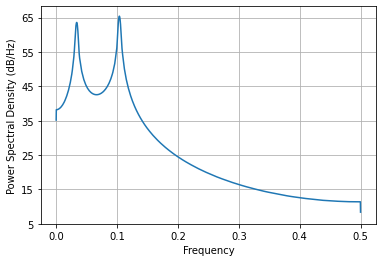

((array([3581.30078884, 7165.12803258, 7172.45853982, ...,  434.49084836,
        434.48216159,  217.23960728]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b6bb250>)
[1827 7189]


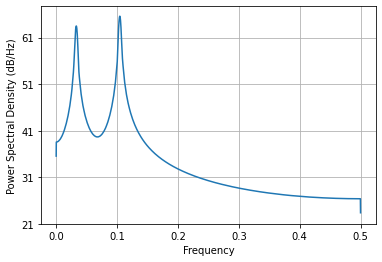

((array([3.21605237e+03, 6.43437967e+03, 6.44094964e+03, ...,
       3.63664414e-02, 3.63500394e-02, 1.81724637e-02]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c5ef370>)
[1827 7189]


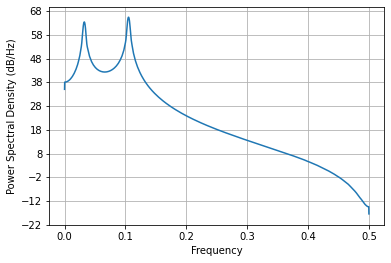

((array([2691.63819865, 5383.8750522 , 5385.89397433, ...,  783.99636737,
        784.00203722,  392.00197716]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c3abdf0>)
[1827 7189]


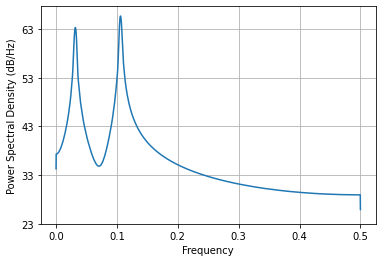

((array([3660.63248693, 7322.10949986, 7324.86897285, ...,  563.09957349,
        563.1060485 ,  281.55417022]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c50e130>)
[1827 7189]


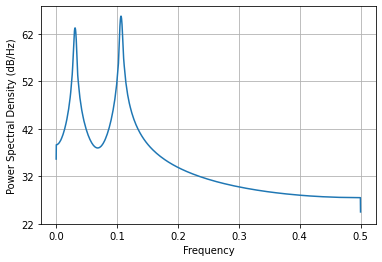

((array([ 727.55032863, 1455.8877336 , 1458.41189127, ...,  436.61398284,
        436.61895728,  218.31033702]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c6216d0>)
[1827 7189]


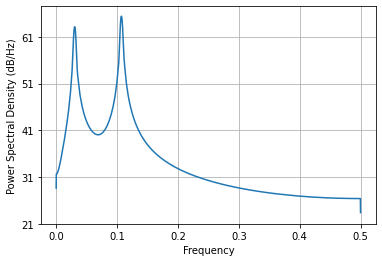

((array([1792.60362934, 3587.37723779, 3593.75490022, ...,  206.05825195,
        206.06430701,  103.03319116]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631b729d90>)
[1827 7189]


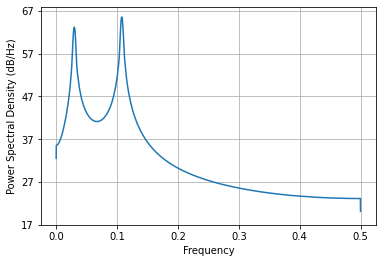

((array([ 765.13322801, 1531.68463545, 1536.02651478, ..., 1008.3799481 ,
       1008.36409068,  504.17933391]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c591af0>)
[1827 7189]


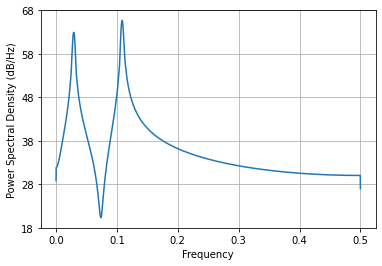

((array([ 555.11670818, 1112.15620635, 1117.85998564, ...,  528.23390052,
        528.22702732,  264.11234039]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c481a60>)
[1827 7189]


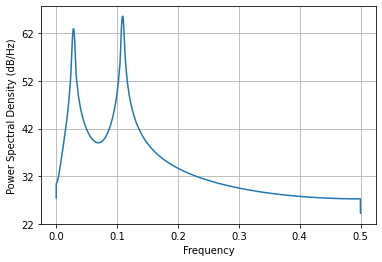

((array([324.08377471, 650.45628271, 657.30256071, ..., 981.06853352,
       981.05343125, 490.52416662]), array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
       4.99511719e-01, 4.99755859e-01, 5.00000000e-01])), <spectrum.psd.Spectrum object at 0x7f631c6ce7f0>)
[1827 7189]


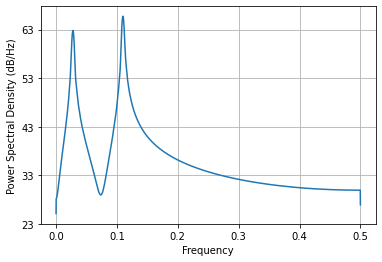

Tranches lost =  0


In [ ]:
# Get FFT with WelchPeriodogram

from spectrum import WelchPeriodogram

lost_count = 0

for i in range(1,len(windows)):
  psd = WelchPeriodogram(windows[i], 4096)
  x_array = linspace(0, 1*samplerate/2, len(psd))
  print(psd)
  #max_list, _ = signal.find_peaks(psd[1], height=750000, prominence=1, width=150)
  print(max_list)
  if len(max_list) < 2:
    lost_count += 1
  plt.show()

print('Tranches lost = ', lost_count)

